In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from netCDF4 import Dataset
import xesmf as xe
import matplotlib.lines as mlines
from matplotlib.patches import Rectangle
import pandas as pd
import metpy as mp
import Ngl
from matplotlib.lines import Line2D
deg=u'\N{DEGREE SIGN}'

In [19]:
folders=['default_100yr_iCESM','a4xplusHad','EPplusHad','PLIOMIPplusHad']
exps=['PI','Abrupt4xCO2','Early Pliocene','Late Pliocene'] 
cdat=[[],[],[],[]]
for i in range(4):
    #cdat[i]=xr.open_dataset('/project/CAREER_PWC/sknapp/'+folders[i]+'/annualclim.nc',decode_times=True)
    cdat[i]=xr.open_dataset(f"{exps[i]}_annual_vars.nc")

longpi=xr.open_dataset('clim.nc')#'/project/CAREER_PWC/sknapp/isotope_significance/meanclim.nc')
sig=xr.open_dataset('std20yrmeans.nc')


In [20]:
# remove=list(cdat[0].keys())
# keep=['PRECC','PRECL','HDOV','H216OV','T','TS','OMEGA','U','V','hyam','hybm','PS','P0','PRECRC_HDOr','PRECRL_HDOR','PRECSC_HDOs','PRECSL_HDOS','PRECRC_H2Or','PRECRL_H2OR','PRECSC_H2Os','PRECSL_H2OS'
#              , 'OCNFRAC','LANDFRAC' ] 
# for i in keep:
#     remove.remove(i)
# #remove
# for i in range(4):
#     cdat[i]=cdat[i].drop_vars(remove)
#     cdat[i].to_netcdf(f"{exps[i]}_annual_vars.nc")


In [21]:
#d18 calc
conv=86400*1000 #m/s -> mm/day
expss=['PIC','A4X','EP','LP']

#interp from hybrid sigma coords to pressure levels
plev=[1000,980,960,940,920,900,850,800,750,700,650,600,550,500,450,400,350,300,250,200,100,50]

hdov=[[],[],[],[]]
h2ov=[[],[],[],[]]
Tnew=[[],[],[],[]]
omega=[[],[],[],[]]
u=[[],[],[],[]]
v=[[],[],[],[]]
for i in range(4):
    hdov[i]=Ngl.vinth2p(cdat[i].HDOV[0,:,:,:],cdat[i].hyam,cdat[i].hybm,plev,cdat[i].PS[0,:,:],1,1000,1,True)
    h2ov[i]=Ngl.vinth2p(cdat[i].H216OV[0,:,:,:],cdat[i].hyam,cdat[i].hybm,plev,cdat[i].PS[0,:,:],1,1000,1,True)
    Tnew[i]=Ngl.vinth2p(cdat[i].T[0,:,:,:],cdat[i].hyam,cdat[i].hybm,plev,cdat[i].PS[0,:,:],1,1000,1,True)
    omega[i]=Ngl.vinth2p(cdat[i].OMEGA[0,:,:,:],cdat[i].hyam,cdat[i].hybm,plev,cdat[i].PS[0,:,:],1,1000,1,True)
    u[i]=Ngl.vinth2p(cdat[i].U[0,:,:,:],cdat[i].hyam,cdat[i].hybm,plev,cdat[i].PS[0,:,:],1,1000,1,True)
    v[i]=Ngl.vinth2p(cdat[i].V[0,:,:,:],cdat[i].hyam,cdat[i].hybm,plev,cdat[i].PS[0,:,:],1,1000,1,True)
    
newv_weights=[plev[i]-plev[i+1] for i in range(len(plev)-1)]


icdd=[[],[],[],[]]
icddvap=[[],[],[],[]]
for i in range(4):
     
    icdd[i]= (((cdat[i].PRECRC_HDOr[0,:,:]+cdat[i].PRECRL_HDOR[0,:,:]+cdat[i].PRECSC_HDOs[0,:,:]+cdat[i].PRECSL_HDOS[0,:,:])/(cdat[i].PRECRC_H2Or[0,:,:]+cdat[i].PRECRL_H2OR[0,:,:]+cdat[i].PRECSC_H2Os[0,:,:]+cdat[i].PRECSL_H2OS[0,:,:]))-1)*1000 
    icddvap[i]= ((hdov[i]/h2ov[i])-1)*1000 
#    icddliq[i]= ((cdat[i].HDOL[0,:,:,:]/cdat[i].H216OL[0,:,:,:])-1)*1000 
#id18conv=((a.PRECRC_H218Or[0,:,:]/a.PRECRC_H216Or[0,:,:])-1)*1000
#id18strat=((a.PRECRL_H218OR[0,:,:]/a.PRECRL_H216OR[0,:,:])-1)*1000


clrs=[(84,48,5),(140,81,10),(191,129,45),(223,194,125),(246,232,195),(199,234,229),(128,205,193),(53,151,143),(1,102,94),(0,60,48)]
prcpclrs=[]
for i in range(len(clrs)):
    prcpclrs.append([])
    for j in range(3):
        prcpclrs[i].append(clrs[i][j]/255)


In [22]:
#significance files
# fold="/project/CAREER_PWC/sknapp/isotope_significance/"
#files=['10-119.nc',  '12-139.nc',  '14-159.nc',  '16-179.nc',  '18-199.nc',  '2-30.nc',  '4-50.nc',  '6-70.nc',  '8-90.nc']
#sig=[[],[],[],[],[],[],[],[],[]]
#sigdd=[[],[],[],[],[],[],[],[],[]]
#clim=xr.open_dataset(fold+"meanclim.nc")
#climdd=(((clim.PRECRC_HDOr[0,:,:]+clim.PRECRL_HDOR[0,:,:]+clim.PRECSC_HDOs[0,:,:]+clim.PRECSL_HDOS[0,:,:])/(clim.PRECRC_H2Or[0,:,:]+clim.PRECRL_H2OR[0,:,:]+clim.PRECSC_H2Os[0,:,:]+clim.PRECSL_H2OS[0,:,:]))-1)*1000
#for i in range(9):
#    sig[i]=xr.open_dataset(fold+files[i])
#    sigdd[i]=(((sig[i].PRECRC_HDOr[:,:,:]+sig[i].PRECRL_HDOR[:,:,:]+sig[i].PRECSC_HDOs[:,:,:]+sig[i].PRECSL_HDOS[:,:,:])/(sig[i].PRECRC_H2Or[:,:,:]+sig[i].PRECRL_H2OR[:,:,:]+sig[i].PRECSC_H2Os[:,:,:]+sig[i].PRECSL_H2OS[:,:,:]))-1)*1000
# sig=xr.open_dataset(fold+'std20yrmeans.nc')
#sig

# Sylvias Method

In [23]:
ddthermcol=[[],[],[],[]]
dddyncol=[[],[],[],[]]
# d18thermcol=[[],[],[],[]]
# d18dyncol=[[],[],[],[]]
pcol=[[],[],[],[]]
sphu=[[],[],[],[]]
qqq=[[],[],[],[]]

for ex in range(4):
    var=cdat[ex]
    lats=range(79,113)#15-15   #(79,113)#15-15 #20N-20S=[74:118] 30S-50S=[42:64] 30N-50N=[128:150]
    lons=range(72,217) #90-270
    #N Africa
    #lats=range(87,124)
    #lons=list(range(273,288))+ list(range(0,41))
    lev=plev
    #remove thermo, only from -20 to 20 if using [74:118]
    #d18vap=((var.H218OV[0,:,lats,lons]/var.H216OV[0,:,lats,lons])-1)*1000
    ddvap=((hdov[ex][:,lats,72:217]/h2ov[ex][:,lats,72:217])-1)*1000

    #dvap=np.ma.masked_outside(dvap,,) #screen out anomalous values if need
    T_prof=Tnew[ex][:,lats,72:217]
    #p = (var.hyam*var.P0 + var.hybm*var.PS[0,:,:])/1000.0 #pressure kPa
    #p = np.flipud(p[:,:,:])[:,lats,:]
    p=np.array(plev)/10
    #p=np.flipud(lev)
    # MOISTURE PROFILE
    # Clausius Clapeyron

    Rv= 8.3144598 #J/mol K
    Lv= 2.500E6 # J/kg
    epsilon=0.622 #psychrometric const
    Mw = 18.016 # molecular weight of water

    # des / dT = Lv * Mw / (1000*Rv)


    # calculate saturation vapor pressure at each level.
    


    #T_prof=np.flipud(T_prof)
    T_prof=T_prof - 273.15 #K to C

    es=np.zeros((T_prof.shape))
    q=np.zeros((T_prof.shape))

    for j in range(len(lats)):
        for k in range(len(lons)):
            for i in range(len(lev)):
                es[i,j,k]= 610.78 * np.exp((17.27 * T_prof[i,j,k]) / (T_prof[i,j,k] + 237.3))  
                q[i,j,k] = epsilon * es[i,j,k] / p[i] / 10. 
    
    sphu[ex]=es
    qqq[ex]=q


    # ISOTOPE PROFILE

    # Set alpha ~ equilibrium temperature fractionation
    # From Majoube 1971        
    a_18O = 1.137e+3
    b_18O = -0.4156
    c_18O = -2.0667e-3

    a_D   = 24.844e+3
    b_D   = -76.248
    c_D   =  52.612e-3

    T_prof+=273.15
#     alpliq18=np.zeros((T_prof.shape))
    alpliqd=np.zeros((T_prof.shape))
    alphad=np.zeros((T_prof.shape))
#     alphad18=np.zeros((T_prof.shape))
    for j in range(len(lats)):
        for k in range(len(lons)):
            for i in range(len(lev)):
                alphad[i,j,k] = a_D/(T_prof[i,j,k]*T_prof[i,j,k]) + b_D/T_prof[i,j,k] + c_D
                alpliqd[i,j,k] = np.exp(alphad[i,j,k])
#                 alphad18[i,j,k] = a_18O/(T_prof[i,j,k]*T_prof[i,j,k]) + b_18O/T_prof[i,j,k] + c_18O
#                 alpliq18[i,j,k] = np.exp(alphad18[i,j,k])
                


    # Rayleigh Equations

    #calculate F, fraction of remaining vapor
    #with difference in Q we get F from layer to layer.

    #Current

    F=np.zeros((T_prof.shape))
    F[0,:,:]=(q[1,:,:]/q[0,:,:])

    for j in range(len(lats)):
        for k in range(len(lons)):
            for i in range(1,len(lev)):
                F[i,j,k]=q[i,j,k]/q[i-1,j,k]


    # Change in Isotopes via change in moisture:

#     d18therm=np.zeros((T_prof.shape))
    ddtherm=np.zeros((T_prof.shape))
    


    for j in range(len(lats)):
        for k in range(len(lons)):
            for i in range(len(lev)):
                if i>0:
#                     d18v= d18therm[i-1,j,k]
                    dDv= ddtherm[i-1,j,k]
                else:
#                     d18v=-12. #np.mean(np.mean(np.flipud(d18vap)[0,:,:],axis=0),axis=0)    #-12.
                    dDv=-80.   #np.mean(np.mean((ddvap)[29,:,:],axis=0),axis=0)    #-80.
                    
#                 d18therm[i,j,k]=(d18v+1000)*np.power(F[i,j,k],(alpliq18[i,j,k]-1.))-1000
                ddtherm[i,j,k]=(dDv+1000)*np.power(F[i,j,k],(alpliqd[i,j,k]-1.))-1000
                
                

    # NOW, remove dD thermo!

    # model:
    #d18_dyn=np.flipud(d18vap)-d18therm
    dd_dyn=ddvap-ddtherm
    
    pcol[ex]=p
    ddthermcol[ex]=ddtherm
    #d18thermcol[ex]=d18therm
    dddyncol[ex]=dd_dyn
    #d18dyncol[ex]=d18_dyn


/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/

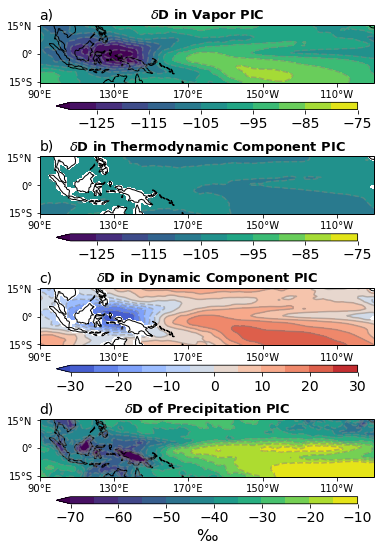

In [24]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=4,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(6,10))
fig.subplots_adjust(bottom=0.15, top=None, left=None, right=None,
                         wspace=None, hspace=0.001)
#ax=ax.flatten()

lats=range(79,113)#10-10    #(79,113)#15-15 #20N-20S=[74:118] 30S-50S=[42:64] 30N-50N=[128:150]
lons=range(72,217)
#dat=[icdd[2][lats,lons]-icdd[1][lats,lons], icdd[3][lats,lons]-icdd[1][lats,lons]]
titles=['$\delta$D in Vapor PIC','$\delta$D in Thermodynamic Component PIC','$\delta$D in Dynamic Component PIC','$\delta$D of Precipitation PIC']
#levelss=[-3,-2,-1,0,1,2,4,6,8,10,12,14]
#colorss=['#08306b','#08519c','#4292c6','#9ecae1','#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000']
a=0
b=7 #1000-850

dat=[np.average(icddvap[0][a:b,lats,72:217],weights=newv_weights[a:b],axis=0) ,
    np.average(ddthermcol[0][0:7,:,:],weights=newv_weights[a:b],axis=0), 
    np.average(dddyncol[0][a:b,:,:],weights=newv_weights[a:b],axis=0),
    icdd[0][lats,lons]]
ranges=[np.arange(-130,-70,5),np.arange(-130,-70,5),np.arange(-30,35,5),np.arange(-70,-5,5)]
cmaps=['viridis','viridis','coolwarm','viridis']
letters=['a)','b)','c)','d)']

for i in range(4):    
    diff=dat[i]
    if i==1 or i==2:
        diff=np.where(cdat[0].OCNFRAC[0,lats,lons]==1,diff,np.nan) #mask out land
        
    #add cyclic point to fill in 0 lon
    #data,lons= add_cyclic_point(diff,coord=icdd[0].lon)

    # Make a filled contour plot

    cs=ax[i].contourf(icdd[0].lon[lons],icdd[0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=ranges[i],cmap=cmaps[i],extend='min')
    con=ax[i].contour(icdd[0].lon[lons],icdd[0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=ranges[i],colors='grey',alpha=0.5)
    #ax[i].clabel(con, fmt = '%2.1d', colors = 'k', fontsize=12)
    # Add coastlines
    ax[i].coastlines()
    #ax[i].add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k') #masks out land
    #ax[i].gridlines()
    # Define the xticks for longitude
    
    ax[i].set_xticks(np.arange(90,271,40), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    ax[i].set_yticks(np.arange(-15,16,15), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax[i].yaxis.set_major_formatter(lat_formatter)

    ax[i].set_title(titles[i],size=13,fontweight='bold')


    # Adjust the location of the subplots 
    # on the page to make room for the colorbar
#     

    # Add a colorbar axis at the bottom of the graph
#    cbar_ax = fig.add_axes([0.15, 0.4, 0.7, 0.02])

    # Draw the colorbar
    cbar=fig.colorbar(cs,orientation='horizontal',ax=ax[i],aspect=40,shrink=0.9)
    if i==3:
        cbar.set_label('‰',size=16)
    cbar.ax.tick_params(labelsize=14)
    
    ax[i].set_title(letters[i],loc='left',  fontsize=14)

# Add a big title at the top
#plt.suptitle('Experimental Sea Surface Temperatures')

#plt.savefig('/homes/sknapp4/figures/figure6.pdf')
plt.savefig('/homes/sknapp4/figures/figure6.png')

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/

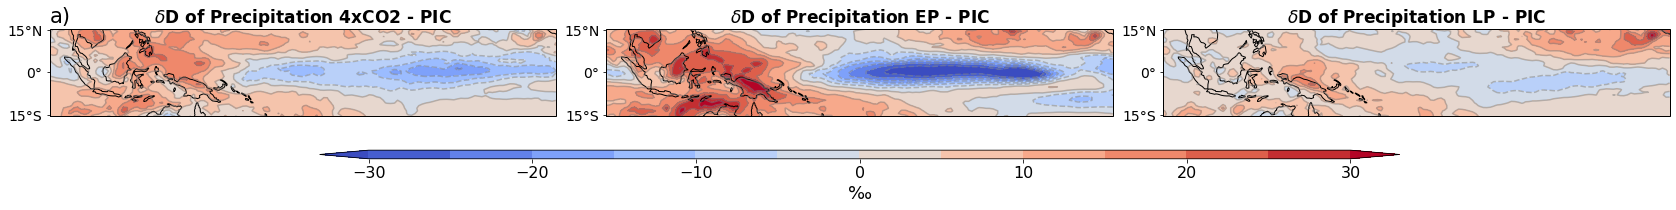

In [8]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(25,6))

ax=ax.flatten()
lats=range(79,113)#10-10    #(79,113)#15-15 #20N-20S=[74:118] 30S-50S=[42:64] 30N-50N=[128:150]
lons=range(72,217)
dat=[icdd[2][lats,lons]-icdd[1][lats,lons], icdd[3][lats,lons]-icdd[1][lats,lons]]
titles=['$\delta$D of Precipitation 4xCO2 - PIC','$\delta$D of Precipitation EP - PIC','$\delta$D of Precipitation LP - PIC']
levelss=[-3,-2,-1,0,1,2,4,6,8,10,12,14]
colorss=['#08306b','#08519c','#4292c6','#9ecae1','#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000']

for i in range(3):
    
    diff=icdd[i+1][lats,lons]-icdd[0][lats,lons]

    #add cyclic point to fill in 0 lon
    #data,lons= add_cyclic_point(diff,coord=icdd[0].lon)

    # Make a filled contour plot

    cs=ax[i].contourf(icdd[0].lon[lons],icdd[0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=np.arange(-30,35,5),cmap='coolwarm',extend='both')
    con=ax[i].contour(icdd[0].lon[lons],icdd[0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=np.arange(-30,35,5),colors='grey',alpha=0.5)
    #ax[i].clabel(con, fmt = '%2.1d', colors = 'k', fontsize=12)
    # Add coastlines
    ax[i].coastlines()
    #ax[i].add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k') #masks out land
    #ax[i].gridlines()
    # Define the xticks for longitude
#     xlab=ax[i].set_xticks(np.arange(90,271,40), crs=ccrs.PlateCarree())
#     ax[i].set_xticklabels(xlab,fontsize=14)
#     lon_formatter = cticker.LongitudeFormatter()
#     ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    ylab=ax[i].set_yticks(np.arange(-15,16,15), crs=ccrs.PlateCarree())
    ax[i].set_yticklabels(ylab,fontsize=14)
    lat_formatter = cticker.LatitudeFormatter()
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    ax[i].set_title(titles[i],size=17,fontweight='bold')
    if i==0:
        ax[i].set_title('a)',loc='left',  fontsize=21)
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.2, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.35, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('‰',size=18)
cbar.ax.tick_params(labelsize=16)

#plt.savefig('/homes/sknapp4/figures/pacificanomsA.pdf')

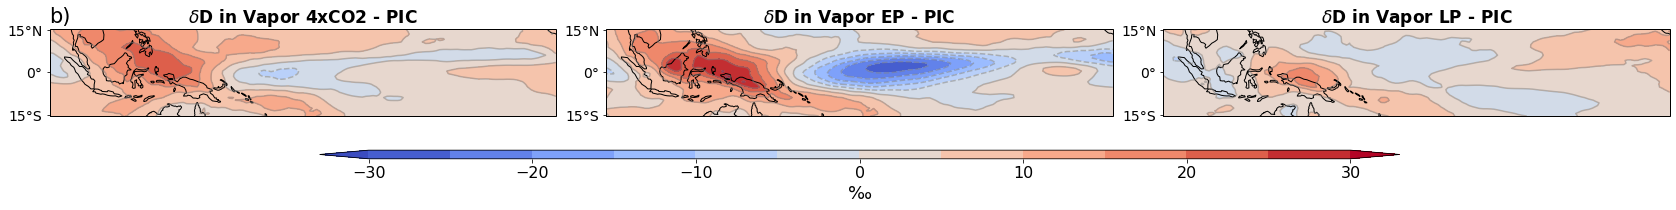

In [9]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(25,6))

ax=ax.flatten()
lats=range(79,113)#10-10    #(79,113)#15-15 #20N-20S=[74:118] 30S-50S=[42:64] 30N-50N=[128:150]
lons=range(72,217)
#dat=[icdd[2][lats,lons]-icdd[1][lats,lons], icdd[3][lats,lons]-icdd[1][lats,lons]]
titles=['$\delta$D in Vapor 4xCO2 - PIC','$\delta$D in Vapor EP - PIC','$\delta$D in Vapor LP - PIC','LP Control $\delta$D in Vapor']
#levelss=[-3,-2,-1,0,1,2,4,6,8,10,12,14]
#colorss=['#08306b','#08519c','#4292c6','#9ecae1','#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000']
a=0
b=7

for i in range(3):
    
    diff=np.average(icddvap[i+1][a:b,lats,72:217],weights=newv_weights[a:b],axis=0) - np.average(icddvap[0][a:b,lats,72:217],weights=newv_weights[a:b],axis=0)
    
    #add cyclic point to fill in 0 lon
    #data,lons= add_cyclic_point(diff,coord=icdd[0].lon)

    # Make a filled contour plot

    cs=ax[i].contourf(icdd[0].lon[lons],icdd[0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=np.arange(-30,35,5),cmap='coolwarm',extend='both')
    con=ax[i].contour(icdd[0].lon[lons],icdd[0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=np.arange(-30,35,5),colors='grey',alpha=0.5)
    #ax[i].clabel(con, fmt = '%2.1d', colors = 'k', fontsize=12)
    # Add coastlines
    ax[i].coastlines()
    #ax[i].add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k') #masks out land
    #ax[i].gridlines()
    # Define the xticks for longitude
#     xlab=ax[i].set_xticks(np.arange(90,271,40), crs=ccrs.PlateCarree())
#     ax[i].set_xticklabels(xlab,fontsize=14)
#     lon_formatter = cticker.LongitudeFormatter()
#     ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    ylab=ax[i].set_yticks(np.arange(-15,16,15), crs=ccrs.PlateCarree())
    ax[i].set_yticklabels(ylab,fontsize=14)
    lat_formatter = cticker.LatitudeFormatter()
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    ax[i].set_title(titles[i],size=17,fontweight='bold')
    if i==0:
        ax[i].set_title('b)',loc='left',  fontsize=21)
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.2, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.35, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('‰',size=18)
cbar.ax.tick_params(labelsize=16)

#plt.savefig('/homes/sknapp4/figures/pacificanomsB.pdf')

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/

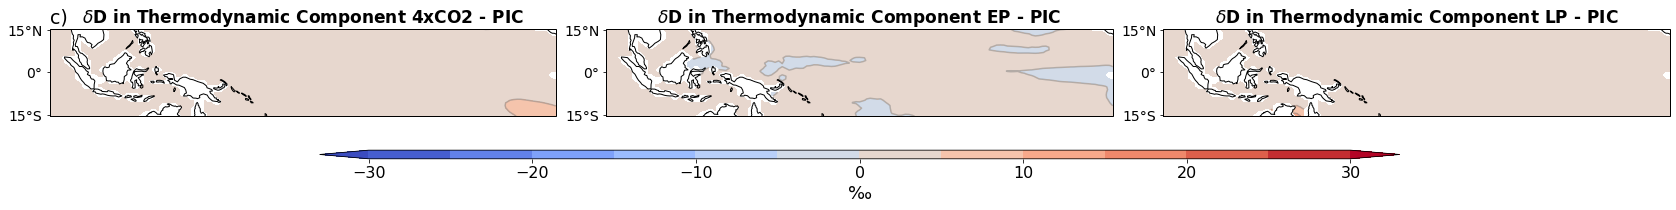

In [10]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(25,6))

ax=ax.flatten()
lats=range(79,113)#10-10    #(79,113)#15-15 #20N-20S=[74:118] 30S-50S=[42:64] 30N-50N=[128:150]
lons=range(72,217)
#dat=[icdd[2][lats,lons]-icdd[1][lats,lons], icdd[3][lats,lons]-icdd[1][lats,lons]]
titles=['$\delta$D in Thermodynamic Component 4xCO2 - PIC','$\delta$D in Thermodynamic Component EP - PIC','$\delta$D in Thermodynamic Component LP - PIC','LP Control $\delta$D in Vapor']
#levelss=[-3,-2,-1,0,1,2,4,6,8,10,12,14]
#colorss=['#08306b','#08519c','#4292c6','#9ecae1','#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000']
a=0
b=7

for i in range(3):
    
    diff=np.average(ddthermcol[i+1][a:b,:,:],weights=newv_weights[a:b],axis=0) - np.average(ddthermcol[0][a:b,:,:],weights=newv_weights[a:b],axis=0)
    diff=np.where(cdat[0].OCNFRAC[0,lats,lons]==1,diff,np.nan)
    #add cyclic point to fill in 0 lon
    #data,lons= add_cyclic_point(diff,coord=icdd[0].lon)

    # Make a filled contour plot

    cs=ax[i].contourf(icdd[0].lon[lons],icdd[0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=np.arange(-30,35,5),cmap='coolwarm',extend='both')
    con=ax[i].contour(icdd[0].lon[lons],icdd[0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=np.arange(-30,35,5),colors='grey',alpha=0.5)
    #ax[i].clabel(con, fmt = '%2.1d', colors = 'k', fontsize=12)
    # Add coastlines
    ax[i].coastlines()
    #ax[i].add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k') #masks out land
    #ax[i].gridlines()
    # Define the xticks for longitude
#     xlab=ax[i].set_xticks(np.arange(90,271,40), crs=ccrs.PlateCarree())
#     ax[i].set_xticklabels(xlab,fontsize=14)
#     lon_formatter = cticker.LongitudeFormatter()
#     ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    ylab=ax[i].set_yticks(np.arange(-15,16,15), crs=ccrs.PlateCarree())
    ax[i].set_yticklabels(ylab,fontsize=14)
    lat_formatter = cticker.LatitudeFormatter()
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    ax[i].set_title(titles[i],size=17,fontweight='bold')
    if i==0:
        ax[i].set_title('c)',loc='left',  fontsize=19)
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.2, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.35, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('‰',size=18)
cbar.ax.tick_params(labelsize=16)

#plt.savefig('/homes/sknapp4/figures/pacificanomsc.pdf')

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/

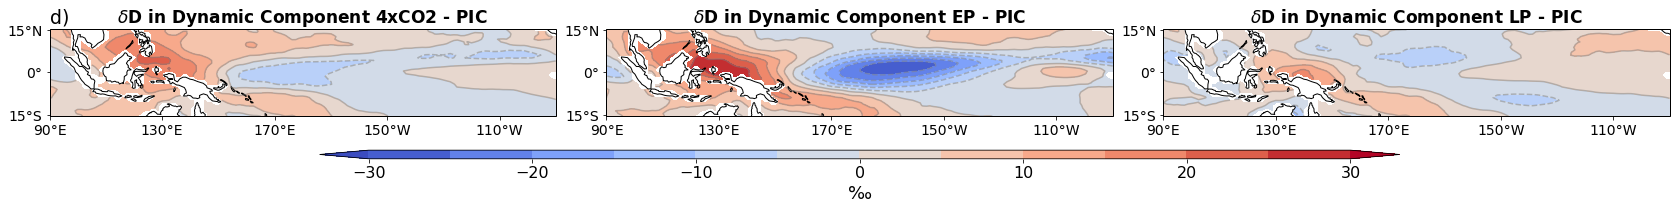

In [11]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(25,6))

ax=ax.flatten()
lats=range(79,113)#10-10    #(79,113)#15-15 #20N-20S=[74:118] 30S-50S=[42:64] 30N-50N=[128:150]
lons=range(72,217)
#dat=[icdd[2][lats,lons]-icdd[1][lats,lons], icdd[3][lats,lons]-icdd[1][lats,lons]]
titles=['$\delta$D in Dynamic Component 4xCO2 - PIC','$\delta$D in Dynamic Component EP - PIC','$\delta$D in Dynamic Component LP - PIC','LP Control $\delta$D in Vapor']
#levelss=[-3,-2,-1,0,1,2,4,6,8,10,12,14]
#colorss=['#08306b','#08519c','#4292c6','#9ecae1','#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000']
a=0
b=7

for i in range(3):
    
    diff=np.average(dddyncol[i+1][a:b,:,:],weights=newv_weights[a:b],axis=0) - np.average(dddyncol[0][a:b,:,:],weights=newv_weights[a:b],axis=0)
    diff=np.where(cdat[0].OCNFRAC[0,lats,lons]==1,diff,np.nan)
    #add cyclic point to fill in 0 lon
    #data,lons= add_cyclic_point(diff,coord=icdd[0].lon)

    # Make a filled contour plot

    cs=ax[i].contourf(icdd[0].lon[lons],icdd[0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=np.arange(-30,35,5),cmap='coolwarm',extend='both')
    con=ax[i].contour(icdd[0].lon[lons],icdd[0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=np.arange(-30,35,5),colors='grey',alpha=0.5)
    #ax[i].clabel(con, fmt = '%2.1d', colors = 'k', fontsize=12)
    # Add coastlines
    ax[i].coastlines()
    #ax[i].add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k') #masks out land
    #ax[i].gridlines()
    # Define the xticks for longitude
    xlab=ax[i].set_xticks(np.arange(90,271,40), crs=ccrs.PlateCarree())
    ax[i].set_xticklabels(xlab,fontsize=14)
    lon_formatter = cticker.LongitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    ylab=ax[i].set_yticks(np.arange(-15,16,15), crs=ccrs.PlateCarree())
    ax[i].set_yticklabels(ylab,fontsize=14)
    lat_formatter = cticker.LatitudeFormatter()
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    ax[i].set_title(titles[i],size=17,fontweight='bold')
    if i==0:
        ax[i].set_title('d)',loc='left',  fontsize=19)
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.2, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.35, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('‰',size=18)
cbar.ax.tick_params(labelsize=16)

#plt.savefig('/homes/sknapp4/figures/pacificanomsd.pdf')

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/

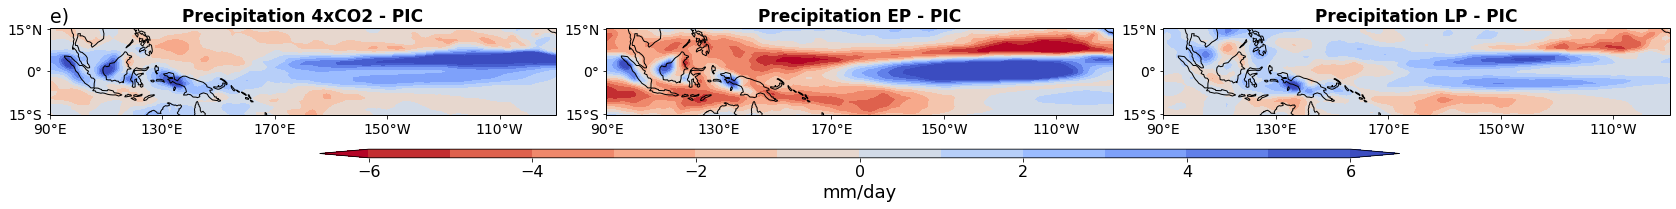

In [12]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(25,6))

ax=ax.flatten()
lats=range(79,113)#10-10    #(79,113)#15-15 #20N-20S=[74:118] 30S-50S=[42:64] 30N-50N=[128:150]
lons=range(72,217)
#dat=[icdd[2][lats,lons]-icdd[1][lats,lons], icdd[3][lats,lons]-icdd[1][lats,lons]]
titles=['Precipitation 4xCO2 - PIC','Precipitation EP - PIC','Precipitation LP - PIC','LP Control $\delta$D in Vapor']
#levelss=[-3,-2,-1,0,1,2,4,6,8,10,12,14]
#colorss=['#08306b','#08519c','#4292c6','#9ecae1','#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000']
a=0
b=7

for i in range(3):
    
    diff=(cdat[i+1].PRECC[0,lats,lons]-cdat[0].PRECC[0,lats,lons] + cdat[i+1].PRECL[0,lats,lons]-cdat[0].PRECL[0,lats,lons])*86400000 
    #diff=np.where(cdat[0].OCNFRAC[0,lats,lons]==1,diff,np.nan)
    #add cyclic point to fill in 0 lon
    #data,lons= add_cyclic_point(diff,coord=icdd[0].lon)

    # Make a filled contour plot

    cs=ax[i].contourf(icdd[0].lon[lons],icdd[0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=np.arange(-6,7,1),cmap='coolwarm_r',extend='both')
    #con=ax[i].contour(icdd[0].lon[lons],icdd[0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=np.arange(-6,7,1),colors='grey',alpha=0.5)
    #ax[i].clabel(con, fmt = '%2.1d', colors = 'k', fontsize=12)
    # Add coastlines
    ax[i].coastlines()
    #ax[i].add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k') #masks out land
    #ax[i].gridlines()
    # Define the xticks for longitude
    xlab=ax[i].set_xticks(np.arange(90,271,40), crs=ccrs.PlateCarree())
    ax[i].set_xticklabels(xlab,fontsize=14)
    lon_formatter = cticker.LongitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    ylab=ax[i].set_yticks(np.arange(-15,16,15), crs=ccrs.PlateCarree())
    ax[i].set_yticklabels(ylab,fontsize=14)
    lat_formatter = cticker.LatitudeFormatter()
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    ax[i].set_title(titles[i],size=17,fontweight='bold')
    if i==0:
        ax[i].set_title('e)',loc='left',  fontsize=19)
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.2, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.35, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('mm/day',size=18)
cbar.ax.tick_params(labelsize=16)

#plt.tight_layout()

#plt.savefig('/homes/sknapp4/figures/pacificanomsE.pdf')

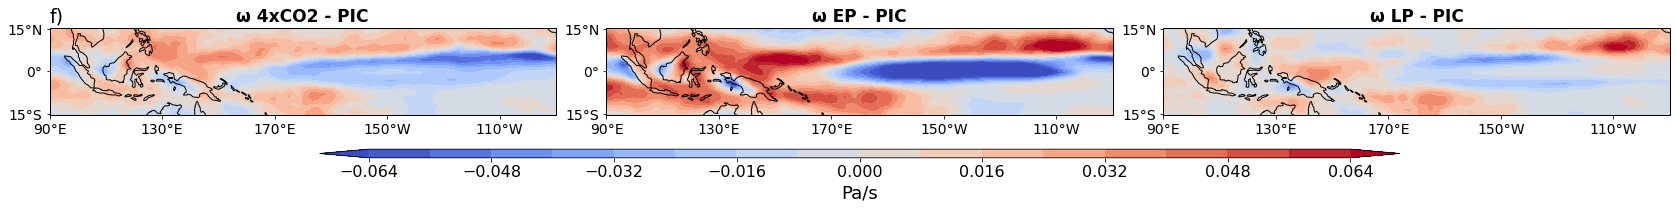

In [13]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(25,6))

ax=ax.flatten()
lats=range(79,113)#10-10    #(79,113)#15-15 #20N-20S=[74:118] 30S-50S=[42:64] 30N-50N=[128:150]
lons=range(72,217)
#dat=[icdd[2][lats,lons]-icdd[1][lats,lons], icdd[3][lats,lons]-icdd[1][lats,lons]]
titles=['\u03C9 4xCO2 - PIC','\u03C9 EP - PIC','\u03C9 LP - PIC','LP Control $\delta$D in Vapor']
#levelss=[-3,-2,-1,0,1,2,4,6,8,10,12,14]
#colorss=['#08306b','#08519c','#4292c6','#9ecae1','#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000']
a=-9
b=-3

for i in range(3):
    
    diff=np.average(omega[i+1][a:b,79:113,lons]-omega[0][a:b,79:113,lons],axis=0,weights=newv_weights[a:b] )
    #diff=np.where(cdat[0].OCNFRAC[0,lats,lons]==1,diff,np.nan)
    #add cyclic point to fill in 0 lon
    #data,lons= add_cyclic_point(diff,coord=icdd[0].lon)

    # Make a filled contour plot

    cs=ax[i].contourf(icdd[0].lon[lons],icdd[0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=np.arange(-.064,0.072,0.008),cmap='coolwarm',extend='both')
    #con=ax[i].contour(icdd[0].lon[lons],icdd[0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=np.arange(-6,7,1),colors='grey',alpha=0.5)
    #ax[i].clabel(con, fmt = '%2.1d', colors = 'k', fontsize=12)
    # Add coastlines
    ax[i].coastlines()
    #ax[i].add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k') #masks out land
    #ax[i].gridlines()
    # Define the xticks for longitude
    xlab=ax[i].set_xticks(np.arange(90,271,40), crs=ccrs.PlateCarree())
    ax[i].set_xticklabels(xlab,fontsize=14)
    lon_formatter = cticker.LongitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    ylab=ax[i].set_yticks(np.arange(-15,16,15), crs=ccrs.PlateCarree())
    ax[i].set_yticklabels(ylab,fontsize=14)
    lat_formatter = cticker.LatitudeFormatter()
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    ax[i].set_title(titles[i],size=17,fontweight='bold')
    if i==0:
        ax[i].set_title('f)',loc='left',  fontsize=19)
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.2, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.35, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('Pa/s',size=18)
cbar.ax.tick_params(labelsize=16)

#plt.tight_layout()

#plt.savefig('/homes/sknapp4/figures/pacificanomsF.pdf')

In [51]:
np.shape(cdat[0].H2OV)

(1, 30, 192, 288)

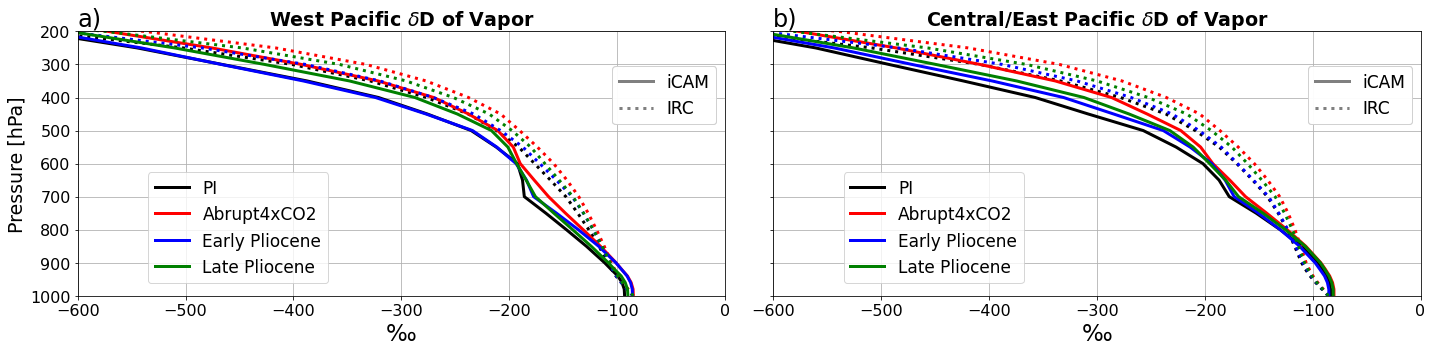

In [14]:
lats=range(79,113)#15-15    #(79,113)#15-15 #20N-20S=[74:118] 30S-50S=[42:64] 30N-50N=[128:150]
lonsW=range(72,129)
lonsCE=range(136,217) #170-270
lons=[lonsW,lonsCE]

plt.figure(figsize=(20,5))
colors=['black','red','blue','green']
lets=['a)','b)']
tits=['West','Central/East']
for j in range(2):
    plt.subplot(1,2,j+1)
    for i in range(0,4): 
        if j==0:
            dat=ddthermcol[i][:,:,0:57]
        else:
            dat=ddthermcol[i][:,:,64:145]
        dat=np.where(cdat[0].OCNFRAC[0,lats,lons[j]]==1,dat,np.nan)
        dat=np.nanmean(np.nanmean(dat,axis=2),axis=1)
        
        if j==0:
            vap=icddvap[i][:,lats,72:129] #using lats and lons at same time doesn't work...?
        else:
            vap=icddvap[i][:,lats,136:217]
        vap=np.where(cdat[0].OCNFRAC[0,lats,lons[j]]==1,vap,np.nan)
        vap=np.nanmean(np.nanmean(vap,axis=2),axis=1)

        plt.plot(dat,plev,color=colors[i],linestyle=':',linewidth=3) #averaged d18O and area average pressure in hPa  np.mean(np.mean(pcol[i],axis=2),axis=1)*10
        plt.plot(vap,plev,label=exps[i],color=colors[i],linewidth=3) #icesm dD data   np.mean(np.mean(pcol[i],axis=2),axis=1)*10
        
        #plt.vlines(icdd[i][lats[32:44],lons[0:33]].mean(),ymin=200,ymax=1000,color=colors[i])
        plt.ylim((200,1000))
        if j==0:
            plt.yticks(size=16)
        else:
            plt.yticks(color='white')
        plt.xlim((-600,0))
        plt.xticks(size=16)
        plt.gca().invert_yaxis()
        plt.grid(True)
        if j==0:
            plt.ylabel('Pressure [hPa]',size=19)
        plt.xlabel('‰',size=23)
        plt.title(tits[j]+' Pacific $\delta$D of Vapor',size=19,weight='bold')
        plt.title(lets[j],loc='left',size=24)
    leg=[]
    for k in range(4):
        leg.append(Line2D([0], [0], color=colors[k], label=exps[k],linewidth=3,linestyle='-'))
    leg=plt.legend(handles=leg,bbox_to_anchor=(0.4,0.5),fontsize=17)
    ax1=plt.gca().add_artist(leg)
    
    leg=[]
    m=['-',':']
    lab=['iCAM','IRC']
    for k in range(2):
        leg.append(Line2D([0], [0], color='grey', label=lab[k],linewidth=3,linestyle=m[k]))
    leg2=plt.legend(handles=leg,bbox_to_anchor=(1,0.9),fontsize=17)
    ax = plt.gca().add_artist(leg2)
    
plt.tight_layout()



#plt.savefig("/homes/sknapp4/figures/verticalvapor1.pdf")

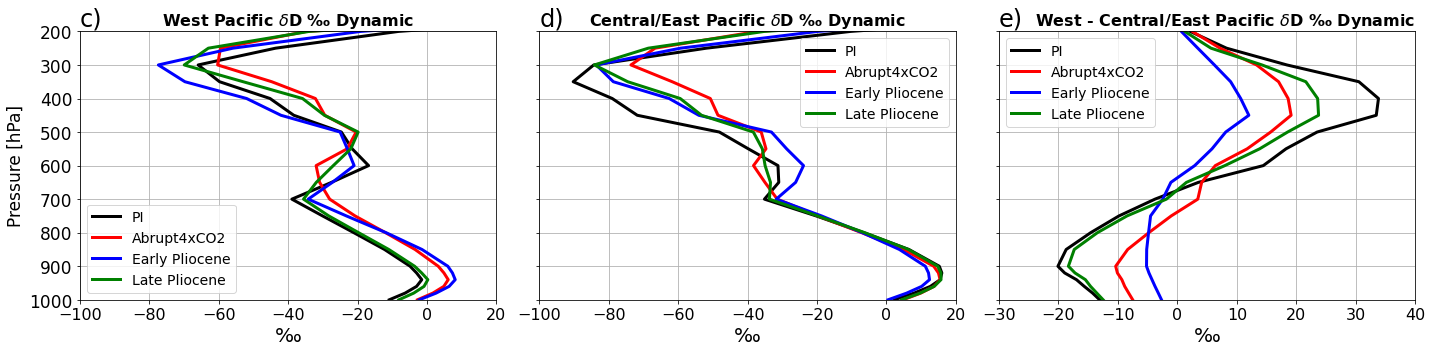

In [15]:
lats=range(79,113)#10-10    #(79,113)#15-15 #20N-20S=[74:118] 30S-50S=[42:64] 30N-50N=[128:150]
lonsW=range(72,129)
lonsCE=range(72,129)

plt.figure(figsize=(20,5))
colors=['black','red','blue','green']
tits=['West','Central/East','West - Central/East']
lets=['c)','d)','e)']
for j in range(3):
    plt.subplot(1,3,j+1)
    for i in range(0,4):   
        if j==0:
            plt.plot(np.mean(np.mean(dddyncol[i][:,:,0:57],axis=2),axis=1) ,plev,color=colors[i],label=exps[i],linewidth=3) #averaged d18O and area average pressure in hPa  np.mean(np.mean(pcol[i],axis=2),axis=1)*10
        if j==1:
            plt.plot(np.mean(np.mean(dddyncol[i][:,:,64:145],axis=2),axis=1) ,plev,color=colors[i],label=exps[i],linewidth=3)
        if j==2:
            plt.plot(np.mean(np.mean(dddyncol[i][:,:,0:57],axis=2),axis=1)-np.mean(np.mean(dddyncol[i][:,:,64:145],axis=2),axis=1) ,plev,color=colors[i],label=exps[i],linewidth=3)
            
        plt.legend(fontsize=14)
        
        plt.ylim((200,1000))
        if j==0:
            plt.yticks(size=17)
        else:
            plt.yticks(size=1,color='white')
        if j==2:
            plt.xlim((-30,40))
        else:
            plt.xlim((-100,20))
        plt.xticks(size=16)
        plt.gca().invert_yaxis()
        plt.grid(True)
        if j==0:
            plt.ylabel('Pressure [hPa]',size=17)
        plt.xlabel('‰',size=20)
        if j==2:
            plt.title(tits[j]+' Pacific $\delta$D ‰ Dynamic',size=16,weight='bold',loc='right')
        else:
            plt.title(tits[j]+' Pacific $\delta$D ‰ Dynamic',size=16,weight='bold')
        plt.title(lets[j],loc='left',size=24)
plt.tight_layout()
#plt.savefig("/homes/sknapp4/figures/verticalvapor3.pdf")

In [12]:
cdat[0].lat[87:105]

<xarray.DataArray 'lat' (lat: 18)>
array([-8.010471, -7.068063, -6.125654, -5.183246, -4.240838, -3.298429,
       -2.356021, -1.413613, -0.471204,  0.471204,  1.413613,  2.356021,
        3.298429,  4.240838,  5.183246,  6.125654,  7.068063,  8.010471])
Coordinates:
  * lat      (lat) float64 -8.01 -7.068 -6.126 -5.183 ... 5.183 6.126 7.068 8.01
Attributes:
    long_name:  latitude
    units:      degrees_north

# Table 1

In [11]:
# table values
    
for i in range(4):
    cdat[i].TS.load()
    weights=np.cos(np.deg2rad(cdat[i].lat))
    tweighted=cdat[i].TS.weighted(weights)
    gmt=tweighted.mean(("lon","lat")) -273.15
    print("GMT of",exps[i],"=",gmt.values)
    
    #8S-8N 130E-155W - 155W-80W
    #lat 85:107 = -9.8 - 9.8, gives very similar results
    weights=np.cos(np.deg2rad(cdat[i].lat[87:105]))
    west=cdat[i].TS[0,85:107,104:165].weighted(weights)
    east=cdat[i].TS[0,85:107,165:225].weighted(weights)
    we=west.mean(("lon","lat")) - east.mean(("lon","lat"))
    print("W/E trop Pac diff in",exps[i],"=",we.values)
    
    #walker
    #zonal mean omega 10S-10N
    zm=cdat[i].OMEGA[0,:,84:108,:].mean(dim='lon')
    #max value of 10S-10N 130E-90W negative omega - zonal means
    maxdiff= (cdat[i].OMEGA[0,:,84:108,104:217].where(cdat[i].OMEGA[0,:,84:108,104:217] < 0) - zm).max()
    print("Max Walker Omega in",exps[i],"=", maxdiff.values)
    
    #meridional SST gradient 15S-15N - 40-20S+20-40N
    subtlat=list(range(52,75))+list(range(117,139))
    weights=np.cos(np.deg2rad(cdat[i].lat[subtlat]))
    subt=cdat[i].TS[0,subtlat,:].where(cdat[i].LANDFRAC[0,subtlat,:]==0).weighted(weights)
    trop=range(79,113)
    weights=np.cos(np.deg2rad(cdat[i].lat[trop]))
    tt=cdat[i].TS[0,79:113,:].where(cdat[i].LANDFRAC[0,79:113,:]==0).weighted(weights)
    mdiff=tt.mean(("lon","lat")) - subt.mean(("lon","lat"))
    print("Meridional SST diff in",exps[i],"=",mdiff.values)
    
    #max streamfunction 
    #used an ncl function on cheyenne

GMT of PI = [14.12608632]
W/E trop Pac diff in PI = 2.2831232109207917
Max Walker Omega in PI = 0.04424290359020233
Meridional SST diff in PI = 6.61898314952191
GMT of Abrupt4xCO2 = [20.14723756]
W/E trop Pac diff in Abrupt4xCO2 = 1.3002699582467017
Max Walker Omega in Abrupt4xCO2 = 0.03795606642961502
Meridional SST diff in Abrupt4xCO2 = 6.135832075250676
GMT of Early Pliocene = [18.98853553]
W/E trop Pac diff in Early Pliocene = 0.541402157389598
Max Walker Omega in Early Pliocene = 0.025491327047348022
Meridional SST diff in Early Pliocene = 3.9946774533921143
GMT of Late Pliocene = [17.84957782]
W/E trop Pac diff in Late Pliocene = 2.162903168111029
Max Walker Omega in Late Pliocene = 0.04125048220157623
Meridional SST diff in Late Pliocene = 6.232389132911919


# Figure 1

In [23]:
#hadOIBL based icesm runs
hsst=[[],[],[],[]]
hsst[0]=xr.open_dataset('/homes/sknapp4/plio_bc/sst_HadOIBl_bc_1x1_clim_pi_c101029.nc')
hsst[1]=xr.open_dataset('/homes/sknapp4/plio_bc/sstice_a4xanomplusmodern.nc')
hsst[2]=xr.open_dataset('/homes/sknapp4/plio_bc/sstice_epanomplusmodern.nc')
hsst[3]=xr.open_dataset('/homes/sknapp4/plio_bc/sstice_pliomipanomplusmodern.nc')


/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, 

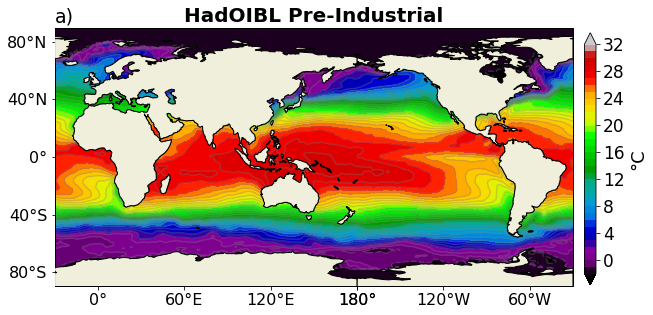

In [24]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(8,5))

#ax=ax.flatten()

#dat=[hsst[0].SST_cpl[:,:,:].mean(axis=0),csst[1].SST_cpl[:,:,:].mean(axis=0),hsst[1].SST_cpl[:,:,:].mean(axis=0),hsst[2].SST_cpl[:,:,:].mean(axis=0), hsst[2].SST_cpl[:,:,:].mean(axis=0)-hsst[1].SST_cpl[:,:,:].mean(axis=0) , 
#     hsst[1].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0), hsst[2].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0)]
titles=['HadOIBL Pre-Industrial']
   
diff=hsst[0].SST_cpl[0,:,:] #can't justify any specific cutoff lol

    #add cyclic point to fill in 0 lon
data,lons= add_cyclic_point(diff,coord=hsst[0].lon)

    # Make a filled contour plot

cs=ax.contourf(lons,hsst[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-2,33,1),cmap='nipy_spectral',extend='both')
con=ax.contour(lons,hsst[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-2,33,1),colors='grey',alpha=0.3)

    # Add coastlines
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k')
    #ax[i].gridlines()
    # Define the xticks for longitude
xlab=ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
ax.set_xticklabels(xlab,fontsize=16)
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ylab=ax.set_yticks(np.arange(-80,81,40), crs=ccrs.PlateCarree())
ax.set_yticklabels(ylab,fontsize=16)
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
    
ax.set_title(titles[0],size=20,fontweight='bold')
ax.set_title('a)',size=19,loc='left')
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.01, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.97, 0.1, 0.02, 0.7]) #left, bottom, width, height

# Draw the colorbar
cbar=fig.colorbar(cs,cax=cbar_ax, orientation='vertical',aspect=50)
cbar.set_label(deg+'C',size=18)
cbar.ax.tick_params(labelsize=17)

# Add a big title at the top
#plt.suptitle('Experimental Sea Surface Temperatures')

#plt.savefig('/homes/sknapp4/figures/figure1a.pdf',bbox_inches='tight')

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, 

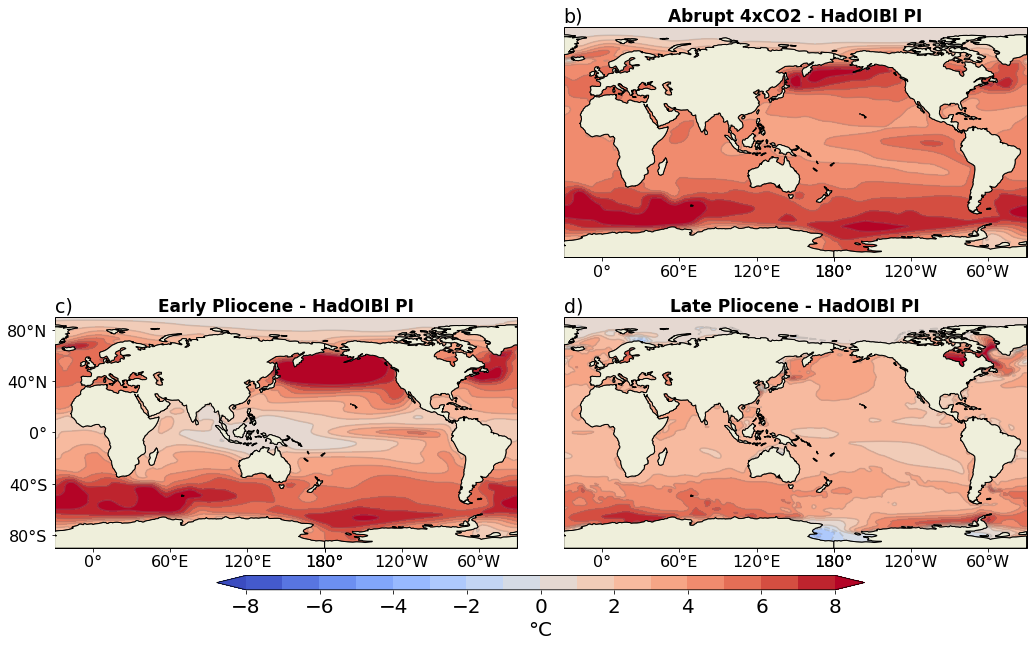

In [25]:
# Define the figure and each axis for the 3 rows and 3 columns

dat=[hsst[3].SST_cpl[:,:,:].mean(axis=0)-hsst[2].SST_cpl[:,:,:].mean(axis=0) , hsst[1].SST_cpl[:,:,:].mean(axis=0)-hsst[0].SST_cpl[:,:,:].mean(axis=0),
     hsst[2].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0), hsst[3].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0)]
titles=['Abrupt 4xCO2 - HadOIBl PI','Early Pliocene - HadOIBl PI','Late Pliocene - HadOIBl PI']


fig, ax = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(15,10))

ax=ax.flatten()

#dat=[hsst[3].SST_cpl[:,:,:].mean(axis=0)-hsst[2].SST_cpl[:,:,:].mean(axis=0) , hsst[1].SST_cpl[:,:,:].mean(axis=0)-hsst[0].SST_cpl[:,:,:].mean(axis=0),
#     hsst[2].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0), hsst[3].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0)]

letters=['a)','b)','c)','d)']
for i in range(1,4):
       
    diff=dat[i]

    #add cyclic point to fill in 0 lon
    data,lons= add_cyclic_point(diff,coord=hsst[0].lon)

    # Make a filled contour plot

    cs=ax[i].contourf(lons,hsst[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-8,9),cmap='coolwarm',extend='both')
    con=ax[i].contour(lons,hsst[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-8,9),colors='grey',alpha=0.3)

    # Add coastlines
    ax[i].coastlines()
    ax[i].add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k')
    #ax[i].gridlines()
    # Define the xticks for longitude
    xlab=ax[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    ax[i].set_xticklabels(xlab,fontsize=16)
    lon_formatter = cticker.LongitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    if i==2:
        ylab=ax[i].set_yticks(np.arange(-80,81,40), crs=ccrs.PlateCarree())
        ax[i].set_yticklabels(ylab,fontsize=16)
        lat_formatter = cticker.LatitudeFormatter()
        ax[i].yaxis.set_major_formatter(lat_formatter)
    
    ax[i].set_title(titles[i-1],size=17,fontweight='bold')
    ax[i].set_title(letters[i],size=19,loc='left')
    


ax[0].set_visible(False)
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.05, right=0.95,
                     wspace=0.1, hspace=0.015)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.set_label(deg+'C',size=20)
cbar.ax.tick_params(labelsize=20)

# Add a big title at the top
#plt.suptitle('Experimental Sea Surface Temperatures')
#plt.savefig('/homes/sknapp4/figures/figure1bcd.pdf')

# Figure 2

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, 

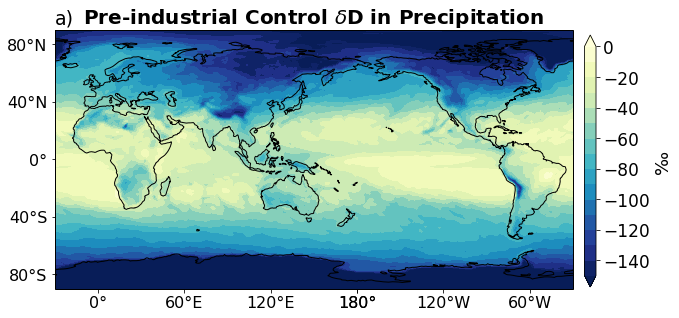

In [26]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(8,5))

#ax=ax.flatten()

#dat=[hsst[0].SST_cpl[:,:,:].mean(axis=0),csst[1].SST_cpl[:,:,:].mean(axis=0),hsst[1].SST_cpl[:,:,:].mean(axis=0),hsst[2].SST_cpl[:,:,:].mean(axis=0), hsst[2].SST_cpl[:,:,:].mean(axis=0)-hsst[1].SST_cpl[:,:,:].mean(axis=0) , 
#     hsst[1].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0), hsst[2].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0)]
titles=['Pre-industrial Control $\delta$D in Precipitation']
   
diff=np.where( (cdat[0].PRECC[0,:,:]+cdat[0].PRECL[0,:,:])*86400000 > 0 ,icdd[0], np.nan) #can't justify any specific cutoff lol

    #add cyclic point to fill in 0 lon
data,lons= add_cyclic_point(diff,coord=cdat[0].lon)

    # Make a filled contour plot

cs=ax.contourf(lons,cdat[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-150,1,10),cmap='YlGnBu_r',extend='both')
#ax.contour(lons,cdat[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-150,1,10),colors='grey',alpha=0.5)

    # Add coastlines
ax.coastlines()
#ax.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k')
    #ax[i].gridlines()
    # Define the xticks for longitude
xlab=ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
ax.set_xticklabels(xlab,fontsize=16)
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ylab=ax.set_yticks(np.arange(-80,81,40), crs=ccrs.PlateCarree())
ax.set_yticklabels(ylab,fontsize=16)
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
    
ax.set_title(titles[0],size=20,fontweight='bold')
ax.set_title('a)',size=19,loc='left')
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.01, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.97, 0.1, 0.02, 0.7]) #left, bottom, width, height

# Draw the colorbar
cbar=fig.colorbar(cs,cax=cbar_ax, orientation='vertical',aspect=50)
cbar.set_label('‰',size=18)
cbar.ax.tick_params(labelsize=17)

# Add a big title at the top
#plt.suptitle('Experimental Sea Surface Temperatures')
#plt.savefig('/homes/sknapp4/figures/figure2a.pdf')

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/

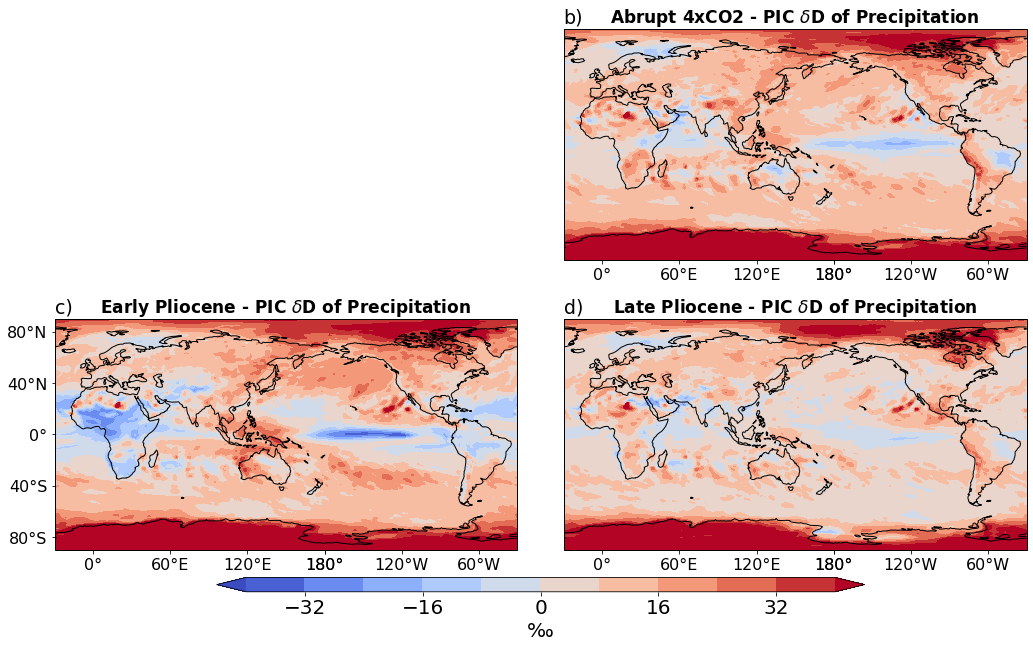

In [8]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(15,10))

ax=ax.flatten()

#dat=[hsst[3].SST_cpl[:,:,:].mean(axis=0)-hsst[2].SST_cpl[:,:,:].mean(axis=0) , hsst[1].SST_cpl[:,:,:].mean(axis=0)-hsst[0].SST_cpl[:,:,:].mean(axis=0),
#     hsst[2].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0), hsst[3].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0)]
titles=['PIC $\delta$D of Precipitation','Abrupt 4xCO2 - PIC $\delta$D of Precipitation','Early Pliocene - PIC $\delta$D of Precipitation','Late Pliocene - PIC $\delta$D of Precipitation']
letters=['a)','b)','c)','d)']
for i in range(1,4):
    
    if i==0:
        diff=diff
    else:    
        diff=icdd[i]-icdd[0]

        #add cyclic point to fill in 0 lon
        data,lons= add_cyclic_point(diff,coord=cdat[0].lon)

        # Make a filled contour plot

        cs=ax[i].contourf(lons,cdat[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-40,44,8),cmap='coolwarm',extend='both')
    #ax[i].contour(lons,cdat[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-40,44,8),colors='grey',alpha=0.5)

    # Add coastlines
    ax[i].coastlines()
    #ax[i].add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k')
    #ax[i].gridlines()
    # Define the xticks for longitude
    xlab=ax[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    ax[i].set_xticklabels(xlab,fontsize=16)
    lon_formatter = cticker.LongitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    if i==2:
        ylab=ax[i].set_yticks(np.arange(-80,81,40), crs=ccrs.PlateCarree())
        ax[i].set_yticklabels(ylab,fontsize=16)
        lat_formatter = cticker.LatitudeFormatter()
        ax[i].yaxis.set_major_formatter(lat_formatter)
    
    ax[i].set_title(titles[i],size=17,fontweight='bold')
    ax[i].set_title(letters[i],size=19,loc='left')
    


ax[0].set_visible(False)
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.05, right=0.95,
                     wspace=0.1, hspace=0.015)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('‰',size=20)
cbar.ax.tick_params(labelsize=20)

# Add a big title at the top
#plt.suptitle('Experimental Sea Surface Temperatures')
plt.savefig('/homes/sknapp4/figures/figure2bcd.pdf')

10

# Fig 3

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, 

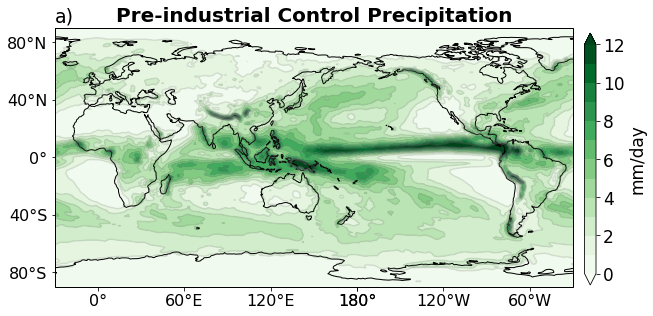

In [28]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(8,5))

#ax=ax.flatten()

#dat=[hsst[0].SST_cpl[:,:,:].mean(axis=0),csst[1].SST_cpl[:,:,:].mean(axis=0),hsst[1].SST_cpl[:,:,:].mean(axis=0),hsst[2].SST_cpl[:,:,:].mean(axis=0), hsst[2].SST_cpl[:,:,:].mean(axis=0)-hsst[1].SST_cpl[:,:,:].mean(axis=0) , 
#     hsst[1].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0), hsst[2].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0)]
titles=['Pre-industrial Control Precipitation']
   
diff=(cdat[0].PRECC[0,:,:]+cdat[0].PRECL[0,:,:])*86400000

    #add cyclic point to fill in 0 lon
data,lons= add_cyclic_point(diff,coord=cdat[0].lon)

    # Make a filled contour plot

cs=ax.contourf(lons,cdat[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(0,13,1),cmap='Greens',extend='both')
ax.contour(lons,cdat[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(0,13,1),colors='grey',alpha=0.2)

    # Add coastlines
ax.coastlines()
#ax.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k')
    #ax[i].gridlines()
    # Define the xticks for longitude
xlab=ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
ax.set_xticklabels(xlab,fontsize=16)
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ylab=ax.set_yticks(np.arange(-80,81,40), crs=ccrs.PlateCarree())
ax.set_yticklabels(ylab,fontsize=16)
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
    
ax.set_title(titles[0],size=20,fontweight='bold')
ax.set_title('a)',size=19,loc='left')
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.01, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.97, 0.1, 0.02, 0.7]) #left, bottom, width, height

# Draw the colorbar
cbar=fig.colorbar(cs,cax=cbar_ax, orientation='vertical',aspect=50)
cbar.set_label('mm/day',size=17)
cbar.ax.tick_params(labelsize=17)

# Add a big title at the top
#plt.suptitle('Experimental Sea Surface Temperatures')
#plt.savefig('/homes/sknapp4/figures/figure3a.pdf')

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, 

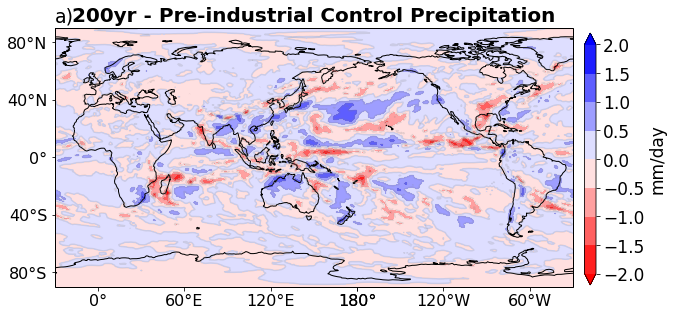

In [5]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(8,5))

#ax=ax.flatten()

#dat=[hsst[0].SST_cpl[:,:,:].mean(axis=0),csst[1].SST_cpl[:,:,:].mean(axis=0),hsst[1].SST_cpl[:,:,:].mean(axis=0),hsst[2].SST_cpl[:,:,:].mean(axis=0), hsst[2].SST_cpl[:,:,:].mean(axis=0)-hsst[1].SST_cpl[:,:,:].mean(axis=0) , 
#     hsst[1].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0), hsst[2].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0)]
titles=['200yr - Pre-industrial Control Precipitation']
   
diff=(longpi.PRECC[0,:,:]+longpi.PRECL[0,:,:])*86400000 - (cdat[0].PRECC[0,:,:]+cdat[0].PRECL[0,:,:])*86400000

    #add cyclic point to fill in 0 lon
data,lons= add_cyclic_point(diff,coord=cdat[0].lon)

    # Make a filled contour plot

cs=ax.contourf(lons,cdat[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-2,2.5,0.5),cmap='bwr_r',extend='both')
ax.contour(lons,cdat[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-2,2.5,0.5),colors='grey',alpha=0.2)

    # Add coastlines
ax.coastlines()
#ax.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k')
    #ax[i].gridlines()
    # Define the xticks for longitude
xlab=ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
ax.set_xticklabels(xlab,fontsize=16)
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ylab=ax.set_yticks(np.arange(-80,81,40), crs=ccrs.PlateCarree())
ax.set_yticklabels(ylab,fontsize=16)
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
    
ax.set_title(titles[0],size=20,fontweight='bold')
#ax.set_title('a)',size=19,loc='left')
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.01, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.97, 0.1, 0.02, 0.7]) #left, bottom, width, height

# Draw the colorbar
cbar=fig.colorbar(cs,cax=cbar_ax, orientation='vertical',aspect=50)
cbar.set_label('mm/day',size=17)
cbar.ax.tick_params(labelsize=17)

# Add a big title at the top
#plt.suptitle('Experimental Sea Surface Temperatures')
#plt.savefig('/homes/sknapp4/figures/figure3a.pdf')

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/

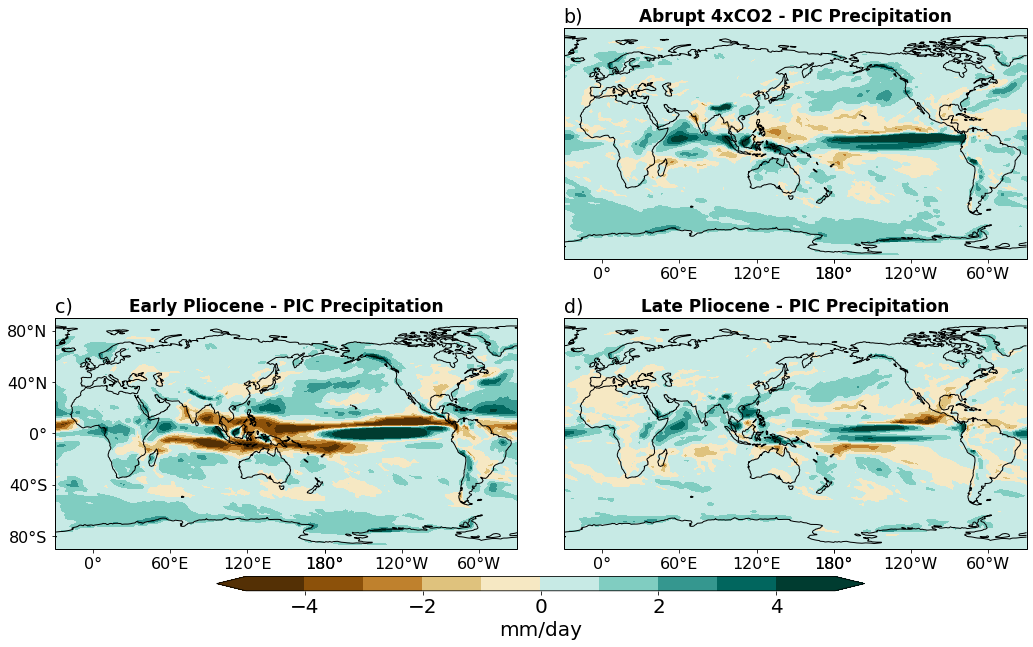

In [29]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(15,10))

ax=ax.flatten()

#dat=[hsst[3].SST_cpl[:,:,:].mean(axis=0)-hsst[2].SST_cpl[:,:,:].mean(axis=0) , hsst[1].SST_cpl[:,:,:].mean(axis=0)-hsst[0].SST_cpl[:,:,:].mean(axis=0),
#     hsst[2].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0), hsst[3].SST_cpl[:,:,:].mean(axis=0) - hsst[0].SST_cpl[:,:,:].mean(axis=0)]
titles=['PIC Precipitation','Abrupt 4xCO2 - PIC Precipitation','Early Pliocene - PIC Precipitation','Late Pliocene - PIC Precipitation']
letters=['a)','b)','c)','d)']
for i in range(1,4):
    
    if i==0:
        diff=(cdat[i].PRECC[0,:,:]+cdat[i].PRECL[0,:,:])*86400000
        #add cyclic point to fill in 0 lon
        data,lons= add_cyclic_point(diff,coord=cdat[0].lon)

        cs=ax[i].contourf(lons,cdat[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(0,14,1),cmap='Blues',extend='both')
        
        cb=plt.colorbar(cs,ax=ax[i],orientation='vertical',shrink=0.7,pad=0.02,aspect=20)
        cb.ax.tick_params(labelsize=14)
    else:    
        diff=(cdat[i].PRECC[0,:,:]+cdat[i].PRECL[0,:,:])*86400000 - (cdat[0].PRECC[0,:,:]+cdat[0].PRECL[0,:,:])*86400000

        #add cyclic point to fill in 0 lon
        data,lons= add_cyclic_point(diff,coord=cdat[0].lon)

        # Make a filled contour plot

        cs=ax[i].contourf(lons,cdat[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-5,6,1),colors=prcpclrs,extend='both')
    #ax[i].contour(lons,cdat[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-40,44,8),colors='grey',alpha=0.5)

    # Add coastlines
    ax[i].coastlines()
    #ax[i].add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k')
    #ax[i].gridlines()
    # Define the xticks for longitude
    xlab=ax[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    ax[i].set_xticklabels(xlab,fontsize=16)
    lon_formatter = cticker.LongitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    if i%2==0:
        ylab=ax[i].set_yticks(np.arange(-80,81,40), crs=ccrs.PlateCarree())
        ax[i].set_yticklabels(ylab,fontsize=16)
        lat_formatter = cticker.LatitudeFormatter()
        ax[i].yaxis.set_major_formatter(lat_formatter)
    
    ax[i].set_title(titles[i],size=17,fontweight='bold')
    ax[i].set_title(letters[i],size=19,loc='left')
    
ax[0].set_visible(False)
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.05, right=0.95,
                     wspace=0.1, hspace=0.015)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('mm/day',size=20)
cbar.ax.tick_params(labelsize=20)

# Add a big title at the top
#plt.suptitle('Experimental Sea Surface Temperatures')
#plt.savefig('/homes/sknapp4/figures/precipbias.pdf')

# Figure 4

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, 

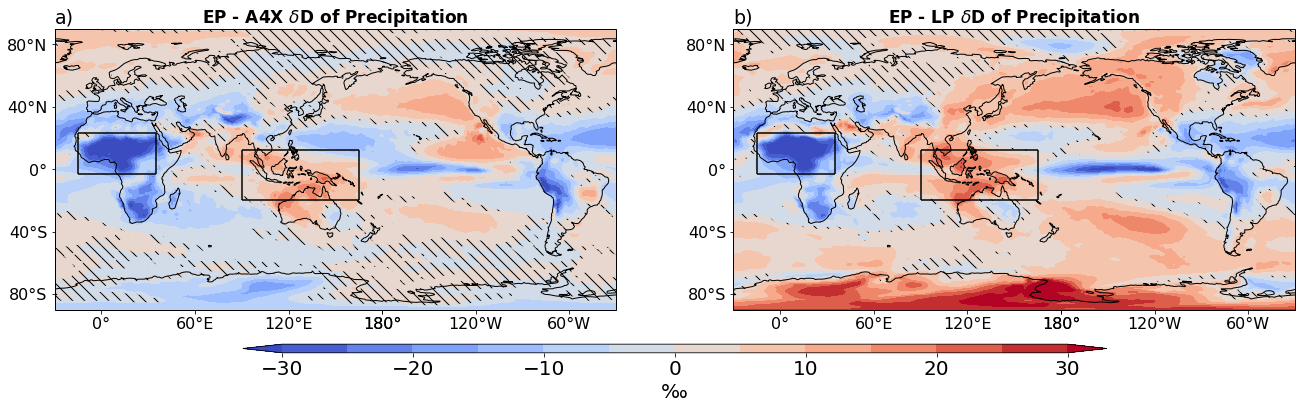

In [6]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(20,6))

ax=ax.flatten()

dat=[icdd[2]-icdd[1], icdd[2]-icdd[3]]
titles=['EP - A4X $\delta$D of Precipitation','EP - LP $\delta$D of Precipitation']
levelss=[-3,-2,-1,0,1,2,4,6,8,10,12,14]
colorss=['#08306b','#08519c','#4292c6','#9ecae1','#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000']
letters=['a)','b)']
for i in range(2):
    
    diff=dat[i]

    #add cyclic point to fill in 0 lon
    data,lons= add_cyclic_point(diff,coord=icdd[0].lon)
    std,lons= add_cyclic_point(sig.to_array()[0,:,:],coord=icdd[0].lon)
    # Make a filled contour plot

    cs=ax[i].contourf(lons,icdd[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-30,35,5),cmap='coolwarm',extend='both')
    #ax[i].contour(lons,icdd[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-30,35,5),colors='grey',alpha=0.5)
    #add hatching where under 2* 20 yr mean std
    ax[i].contourf(lons,icdd[0].lat, np.where(abs(data)<(2*std), 1, np.nan) , transform = ccrs.PlateCarree(), levels=[0,1],colors='none',hatches=['\\\\'] )
    # Add coastlines
    ax[i].coastlines()
    #ax[i].add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k') #masks out land
    # add boxes
    boxcol='black'
    ax[i].hlines(y=12,xmin=-60,xmax=15,color=boxcol)
    ax[i].hlines(y=-20,xmin=-60,xmax=15,color=boxcol)
    ax[i].vlines(x=-60,ymin=-20,ymax=12,color=boxcol)
    ax[i].vlines(x=15,ymin=-20,ymax=12,color=boxcol)
    
    ax[i].hlines(y=23,xmin=-165,xmax=-115,color=boxcol)
    ax[i].hlines(y=-3,xmin=-165,xmax=-115,color=boxcol)
    ax[i].vlines(x=-165,ymin=-3,ymax=23,color=boxcol)
    ax[i].vlines(x=-115,ymin=-3,ymax=23,color=boxcol)
    #ax[i].gridlines()
    # Define the xticks for longitude
    xlab=ax[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    ax[i].set_xticklabels(xlab,fontsize=16)
    lon_formatter = cticker.LongitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    ylab=ax[i].set_yticks(np.arange(-80,81,40), crs=ccrs.PlateCarree())
    ax[i].set_yticklabels(ylab,fontsize=16)
    lat_formatter = cticker.LatitudeFormatter()
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    
    ax[i].set_title(titles[i],size=17,fontweight='bold')
    ax[i].set_title(letters[i],size=19,loc='left')
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('‰',size=20)
cbar.ax.tick_params(labelsize=20)

# Add a big title at the top
#plt.suptitle('Experimental Sea Surface Temperatures')
#plt.savefig('/homes/sknapp4/figures/figure3ab.pdf')
plt.savefig('/homes/sknapp4/figures/figure3ab.png')

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, 

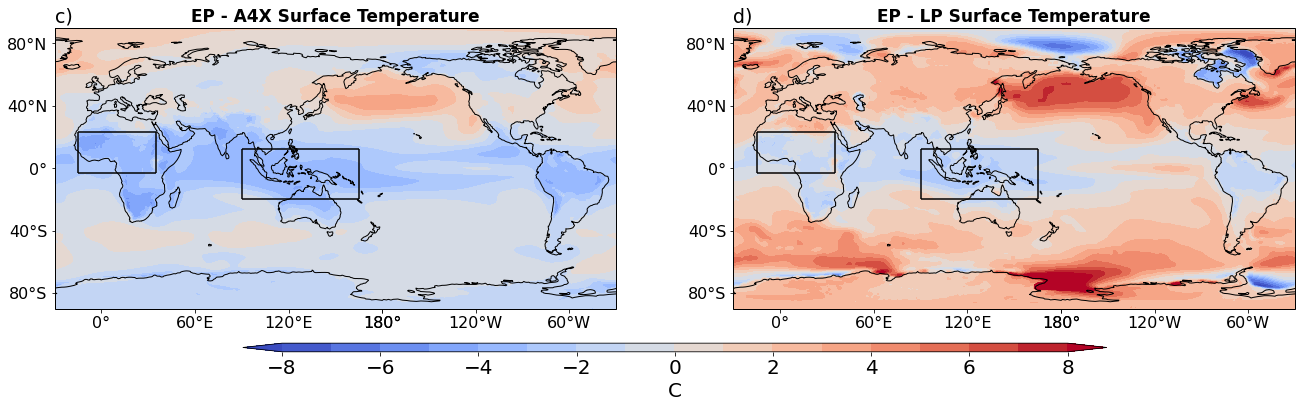

In [7]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(20,6))

ax=ax.flatten()

dat=[cdat[2].TS[0,:,:]-cdat[1].TS[0,:,:], cdat[2].TS[0,:,:]-cdat[3].TS[0,:,:]]
titles=['EP - A4X Surface Temperature','EP - LP Surface Temperature']
letters=['c)','d)']

for i in range(2):
    
    diff=dat[i]

    #add cyclic point to fill in 0 lon
    data,lons= add_cyclic_point(diff,coord=icdd[0].lon)

    # Make a filled contour plot

    cs=ax[i].contourf(lons,icdd[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-8,9,1),cmap='coolwarm',extend='both')
    #ax[i].contour(lons,icdd[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-8,9,1),colors='grey',alpha=0.5)

    # add boxes
    boxcol='black'
    ax[i].hlines(y=12,xmin=-60,xmax=15,color=boxcol)
    ax[i].hlines(y=-20,xmin=-60,xmax=15,color=boxcol)
    ax[i].vlines(x=-60,ymin=-20,ymax=12,color=boxcol)
    ax[i].vlines(x=15,ymin=-20,ymax=12,color=boxcol)
    
    ax[i].hlines(y=23,xmin=-165,xmax=-115,color=boxcol)
    ax[i].hlines(y=-3,xmin=-165,xmax=-115,color=boxcol)
    ax[i].vlines(x=-165,ymin=-3,ymax=23,color=boxcol)
    ax[i].vlines(x=-115,ymin=-3,ymax=23,color=boxcol)
    # Add coastlines
    ax[i].coastlines()
    #ax[i].add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k') #masks out land
    #ax[i].gridlines()
    # Define the xticks for longitude
    xlab=ax[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    ax[i].set_xticklabels(xlab,fontsize=16)
    lon_formatter = cticker.LongitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    ylab=ax[i].set_yticks(np.arange(-80,81,40), crs=ccrs.PlateCarree())
    ax[i].set_yticklabels(ylab,fontsize=16)
    lat_formatter = cticker.LatitudeFormatter()
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    ax[i].set_title(titles[i],size=17,fontweight='bold')
    ax[i].set_title(letters[i],size=19,loc='left')
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('C',size=20)
cbar.ax.tick_params(labelsize=20)

# Add a big title at the top
#plt.suptitle('Experimental Sea Surface Temperatures')
#plt.savefig('/homes/sknapp4/figures/figure3cd.pdf')
plt.savefig('/homes/sknapp4/figures/figure3cd.png')

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, 

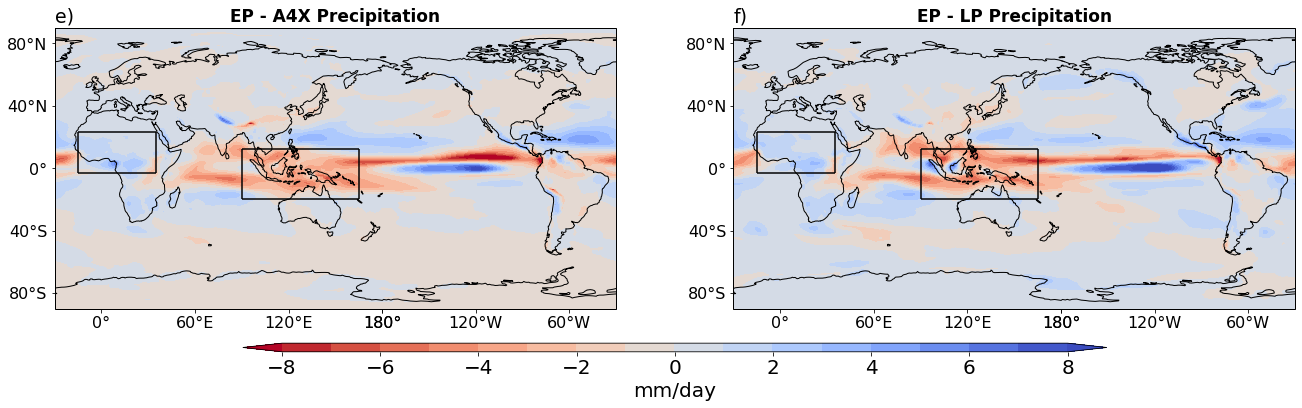

In [8]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)},
                        figsize=(20,6))

ax=ax.flatten()

dat=[(cdat[2].PRECC[0,:,:]+cdat[2].PRECL[0,:,:])*86400000-(cdat[1].PRECC[0,:,:]+cdat[1].PRECL[0,:,:])*86400000, 
     (cdat[2].PRECC[0,:,:]+cdat[2].PRECL[0,:,:])*86400000-(cdat[3].PRECC[0,:,:]+cdat[3].PRECL[0,:,:])*86400000]
titles=['EP - A4X Precipitation','EP - LP Precipitation']
letters=['e)','f)']

for i in range(2):
    
    diff=dat[i]

    #add cyclic point to fill in 0 lon
    data,lons= add_cyclic_point(diff,coord=icdd[0].lon)

    # Make a filled contour plot

    cs=ax[i].contourf(lons,icdd[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-8,9,1),cmap='coolwarm_r',extend='both')
    #ax[i].contour(lons,icdd[0].lat,data,transform = ccrs.PlateCarree(),levels=np.arange(-8,9,1),colors='grey',alpha=0.5)

    # add boxes
    boxcol='black'
    ax[i].hlines(y=12,xmin=-60,xmax=15,color=boxcol)
    ax[i].hlines(y=-20,xmin=-60,xmax=15,color=boxcol)
    ax[i].vlines(x=-60,ymin=-20,ymax=12,color=boxcol)
    ax[i].vlines(x=15,ymin=-20,ymax=12,color=boxcol)
    
    ax[i].hlines(y=23,xmin=-165,xmax=-115,color=boxcol)
    ax[i].hlines(y=-3,xmin=-165,xmax=-115,color=boxcol)
    ax[i].vlines(x=-165,ymin=-3,ymax=23,color=boxcol)
    ax[i].vlines(x=-115,ymin=-3,ymax=23,color=boxcol)
    # Add coastlines
    ax[i].coastlines()
    #ax[i].add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k') #masks out land
    #ax[i].gridlines()
    # Define the xticks for longitude
    xlab=ax[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    ax[i].set_xticklabels(xlab,fontsize=16)
    lon_formatter = cticker.LongitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    ylab=ax[i].set_yticks(np.arange(-80,81,40), crs=ccrs.PlateCarree())
    ax[i].set_yticklabels(ylab,fontsize=16)
    lat_formatter = cticker.LatitudeFormatter()
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    ax[i].set_title(titles[i],size=17,fontweight='bold')
    ax[i].set_title(letters[i],size=19,loc='left')
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('mm/day',size=20)
cbar.ax.tick_params(labelsize=20)

#plt.savefig('/homes/sknapp4/figures/figure3ef.pdf')
plt.savefig('/homes/sknapp4/figures/figure3ef.png')

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/

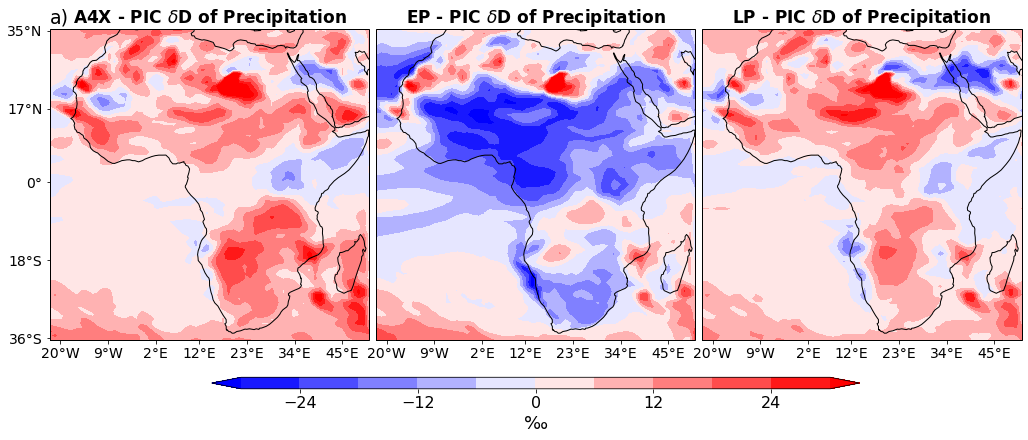

In [36]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)},
                        figsize=(15,8))
exps[0]="Pre-industrial"
ax=ax.flatten()

a=29  #19-23 
b=30
#cgrad=np.gradient(np.average(icddvap[1][season][a:b,:,:],weights=v_weights[a:b],axis=0))
#cadv = np.average(cdat[1][season].V[0,a:b,:,:],weights=v_weights[a:b],axis=0)*cgrad[0] + np.average(cdat[1][season].U[0,a:b,:,:],weights=v_weights[a:b],axis=0)*cgrad[1]

for i in range(3):
    lats=range(57,134)
    lons=list(range(270,288))+ list(range(0,41))

    #grad=np.gradient(np.average(icddvap[i+2][season][a:b,lats,lons],weights=v_weights[a:b],axis=0))
    #adv=np.average(cdat[i+2][season].V[0,a:b,lats,lons],weights=v_weights[a:b],axis=0)*grad[0] + np.average(cdat[i+2][season].U[0,a:b,lats,lons],weights=v_weights[a:b],axis=0)*grad[1]
    
    
    vap=icdd[i+1][lats,lons]-icdd[0][lats,lons]
    #add cyclic point to fill in 0 lon
    
    vap,lon=add_cyclic_point(vap,coord=((cdat[i].lon[lons] - 180) % 360) - 180)
    #dd,lon=add_cyclic_point(icdd[i+2][season][lats,lons]-icdd[1][season][lats,lons],coord=((cdat[i][season].lon[lons] - 180) % 360) - 180)
    #adv,lon=add_cyclic_point(adv,coord=((cdat[i][season].lon[lons] - 180) % 360) - 180)
    # Make a filled contour plot

    #ax[i].quiver(lon,cdat[1].lat[lats],u,v,transform = ccrs.PlateCarree())
    cs=ax[i].contourf(lon,cdat[1].lat[lats],vap,transform = ccrs.PlateCarree(),levels=np.arange(-30,35,6),cmap='bwr',alpha=1,extend='both')
    #con=ax[i].contour(lon,cdat[1].lat[lats],vap,transform = ccrs.PlateCarree(),levels=np.arange(-30,35,5),colors='grey',alpha=0.8,extend='both')
    #ax[i].clabel(con, fmt = '%2.1d', colors = 'k', fontsize=14)
    # Add coastlines
    ax[i].coastlines()
    #ax[i].gridlines()
    # Define the xticks for longitude
    lons=((cdat[i].lon[lons] - 180) % 360) - 180
    xlab=ax[i].set_xticks(np.linspace(-20,45,7).round(decimals=0), crs=ccrs.PlateCarree())
    ax[i].set_xticklabels(xlab,fontsize=14)
    lon_formatter = cticker.LongitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)
    
    # Define the yticks for latitude
    if i==0:
        ylab=ax[i].set_yticks(np.linspace(cdat[i].lat[lats].min().round(),cdat[i].lat[lats].max().round(),5).round(decimals=0), crs=ccrs.PlateCarree())
        ax[i].set_yticklabels(ylab,fontsize=14)
        lat_formatter = cticker.LatitudeFormatter()
        ax[i].yaxis.set_major_formatter(lat_formatter)
    if i==0:
        ax[i].set_title('a)',loc='left',size=19)
    ax[i].set_title(expss[i+1]+" - PIC $\delta$D of Precipitation",size=17,fontweight='bold')
    
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.02, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.22, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('‰',size=18)
cbar.ax.tick_params(labelsize=16)

#plt.savefig('/homes/sknapp4/figures/fig7a.pdf')
#plt.savefig('/homes/sknapp4/figures/fig7a.png')

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/

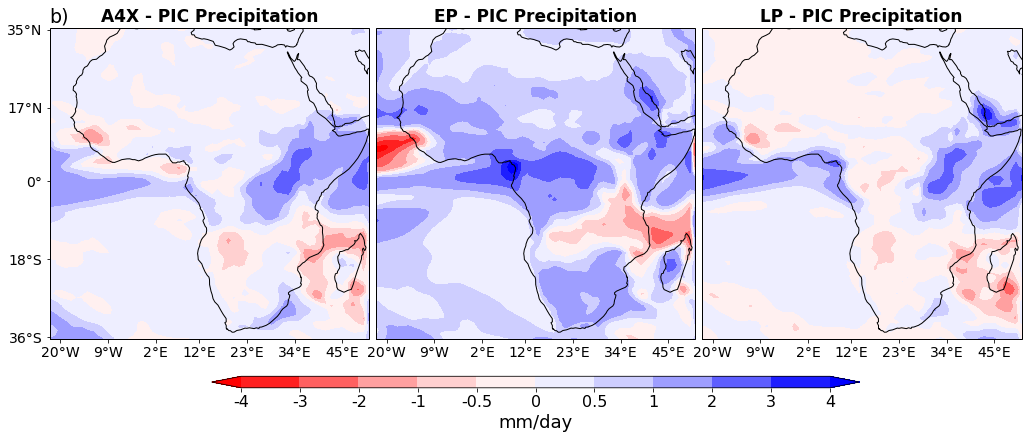

In [37]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)},
                        figsize=(15,8))
exps[0]="Pre-industrial"
ax=ax.flatten()

levs=[-4,-3,-2,-1,-0.5,0,0.5,1,2,3,4]
#cgrad=np.gradient(np.average(icddvap[1][season][a:b,:,:],weights=v_weights[a:b],axis=0))
#cadv = np.average(cdat[1][season].V[0,a:b,:,:],weights=v_weights[a:b],axis=0)*cgrad[0] + np.average(cdat[1][season].U[0,a:b,:,:],weights=v_weights[a:b],axis=0)*cgrad[1]

for i in range(3):
    lats=range(57,134)
    lons=list(range(270,288))+ list(range(0,41))

    #grad=np.gradient(np.average(icddvap[i+2][season][a:b,lats,lons],weights=v_weights[a:b],axis=0))
    #adv=np.average(cdat[i+2][season].V[0,a:b,lats,lons],weights=v_weights[a:b],axis=0)*grad[0] + np.average(cdat[i+2][season].U[0,a:b,lats,lons],weights=v_weights[a:b],axis=0)*grad[1]
    
    
    vap=(cdat[i+1].PRECC[0,lats,lons]+cdat[i+1].PRECL[0,lats,lons])*86400000-(cdat[0].PRECC[0,lats,lons]+cdat[0].PRECL[0,lats,lons])*86400000
    #add cyclic point to fill in 0 lon
    
    vap,lon=add_cyclic_point(vap,coord=((cdat[i].lon[lons] - 180) % 360) - 180)
    #dd,lon=add_cyclic_point(icdd[i+2][season][lats,lons]-icdd[1][season][lats,lons],coord=((cdat[i][season].lon[lons] - 180) % 360) - 180)
    #adv,lon=add_cyclic_point(adv,coord=((cdat[i][season].lon[lons] - 180) % 360) - 180)
    # Make a filled contour plot

    #ax[i].quiver(lon,cdat[1].lat[lats],u,v,transform = ccrs.PlateCarree())
    cs=ax[i].contourf(lon,cdat[1].lat[lats],vap,transform = ccrs.PlateCarree(),levels=levs,cmap='bwr_r',alpha=1,extend='both')
    #con=ax[i].contour(lon,cdat[1].lat[lats],vap,transform = ccrs.PlateCarree(),levels=np.arange(-30,35,5),colors='grey',alpha=0.8,extend='both')
    #ax[i].clabel(con, fmt = '%2.1d', colors = 'k', fontsize=14)
    # Add coastlines
    ax[i].coastlines()
    #ax[i].gridlines()
    # Define the xticks for longitude
    lons=((cdat[i].lon[lons] - 180) % 360) - 180
    xlab=ax[i].set_xticks(np.linspace(-20,45,7).round(decimals=0), crs=ccrs.PlateCarree())
    ax[i].set_xticklabels(xlab,fontsize=14)
    lon_formatter = cticker.LongitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)
    
    # Define the yticks for latitude
    if i==0:
        ylab=ax[i].set_yticks(np.linspace(cdat[i].lat[lats].min().round(),cdat[i].lat[lats].max().round(),5).round(decimals=0), crs=ccrs.PlateCarree())
        ax[i].set_yticklabels(ylab,fontsize=14)
        lat_formatter = cticker.LatitudeFormatter()
        ax[i].yaxis.set_major_formatter(lat_formatter)
    if i==0:
        ax[i].set_title('b)',loc='left',size=19)
    ax[i].set_title(expss[i+1]+" - PIC Precipitation",size=17,fontweight='bold')
    
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.02, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.22, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs,ticks=levs,cax=cbar_ax,orientation='horizontal')
cbar.set_label('mm/day',size=18)
cbar.ax.set_xticklabels(levs)
cbar.ax.tick_params(labelsize=16)

#plt.savefig('/homes/sknapp4/figures/fig7b.pdf')
#plt.savefig('/homes/sknapp4/figures/fig7b.png')

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, 

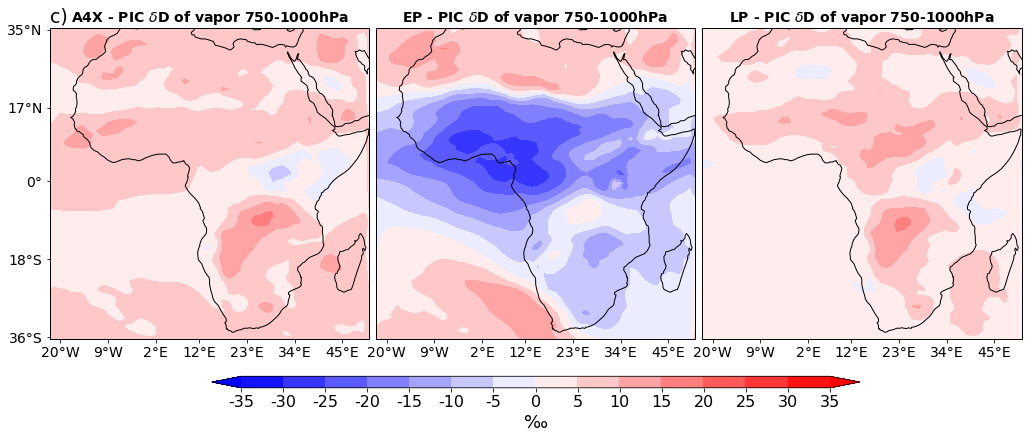

In [38]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)},
                        figsize=(15,8))
exps[0]="Pre-industrial"
ax=ax.flatten()
levs=np.arange(-35,40,5)

a=0
b=9
for i in range(3):
    lats=range(57,134)
    lons=list(range(270,288))+ list(range(0,41))
    
    
    vap=np.average(icddvap[i+1][a:b,57:134,lons],weights=newv_weights[a:b],axis=0) - np.average(icddvap[0][a:b,57:134,lons],weights=newv_weights[a:b],axis=0)
    #add cyclic point to fill in 0 lon
    
    vap,lon=add_cyclic_point(vap,coord=((cdat[i].lon[lons] - 180) % 360) - 180)
    
    # Make a filled contour plot

    
    cs=ax[i].contourf(lon,cdat[1].lat[lats],vap,transform = ccrs.PlateCarree(),levels=levs,cmap='bwr',alpha=1,extend='both')
    #con=ax[i].contour(lon,cdat[1].lat[lats],vap,transform = ccrs.PlateCarree(),levels=np.arange(-30,35,5),colors='grey',alpha=0.8,extend='both')
    #ax[i].clabel(con, fmt = '%2.1d', colors = 'k', fontsize=14)
    # Add coastlines
    ax[i].coastlines()
    #ax[i].gridlines()
    # Define the xticks for longitude
    lons=((cdat[i].lon[lons] - 180) % 360) - 180
    xlab=ax[i].set_xticks(np.linspace(-20,45,7).round(decimals=0), crs=ccrs.PlateCarree())
    ax[i].set_xticklabels(xlab,fontsize=14)
    lon_formatter = cticker.LongitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)
    
    # Define the yticks for latitude
    if i==0:
        ylab=ax[i].set_yticks(np.linspace(cdat[i].lat[lats].min().round(),cdat[i].lat[lats].max().round(),5).round(decimals=0), crs=ccrs.PlateCarree())
        ax[i].set_yticklabels(ylab,fontsize=14)
        lat_formatter = cticker.LatitudeFormatter()
        ax[i].yaxis.set_major_formatter(lat_formatter)
    if i==0:
        ax[i].set_title('c)',loc='left',size=19)
    ax[i].set_title(expss[i+1]+" - PIC $\delta$D of vapor 750-1000hPa",size=14,fontweight='bold')
    
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.02, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.22, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs,ticks=levs,cax=cbar_ax,orientation='horizontal')
cbar.set_label('‰',size=18)
cbar.ax.set_xticklabels(levs)
cbar.ax.tick_params(labelsize=16)

#plt.savefig('/homes/sknapp4/figures/fig7c.pdf')
#plt.savefig('/homes/sknapp4/figures/fig7c.png')

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, 

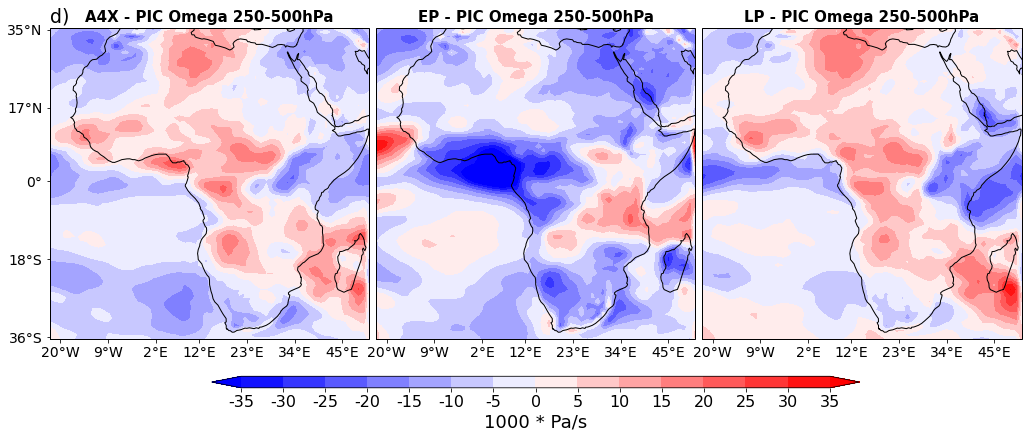

In [39]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)},
                        figsize=(15,8))
exps[0]="Pre-industrial"
ax=ax.flatten()
levs=np.arange(-35,40,5)

a=13
b=19
for i in range(3):
    lats=range(57,134)
    lons=list(range(270,288))+ list(range(0,41))
    
    
    vap=np.average(omega[i+1][a:b,57:134,lons],weights=newv_weights[a:b],axis=0)*1000 - np.average(omega[0][a:b,57:134,lons],weights=newv_weights[a:b],axis=0)*1000
    #add cyclic point to fill in 0 lon
    
    vap,lon=add_cyclic_point(vap,coord=((cdat[i].lon[lons] - 180) % 360) - 180)
    
    # Make a filled contour plot

    
    cs=ax[i].contourf(lon,cdat[1].lat[lats],vap,transform = ccrs.PlateCarree(),levels=levs,cmap='bwr',alpha=1,extend='both')
    #con=ax[i].contour(lon,cdat[1].lat[lats],vap,transform = ccrs.PlateCarree(),levels=np.arange(-30,35,5),colors='grey',alpha=0.8,extend='both')
    #ax[i].clabel(con, fmt = '%2.1d', colors = 'k', fontsize=14)
    # Add coastlines
    ax[i].coastlines()
    #ax[i].gridlines()
    # Define the xticks for longitude
    lons=((cdat[i].lon[lons] - 180) % 360) - 180
    xlab=ax[i].set_xticks(np.linspace(-20,45,7).round(decimals=0), crs=ccrs.PlateCarree())
    ax[i].set_xticklabels(xlab,fontsize=14)
    lon_formatter = cticker.LongitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)
    
    # Define the yticks for latitude
    if i==0:
        ylab=ax[i].set_yticks(np.linspace(cdat[i].lat[lats].min().round(),cdat[i].lat[lats].max().round(),5).round(decimals=0), crs=ccrs.PlateCarree())
        ax[i].set_yticklabels(ylab,fontsize=14)
        lat_formatter = cticker.LatitudeFormatter()
        ax[i].yaxis.set_major_formatter(lat_formatter)
    if i==0:
        ax[i].set_title('d)',loc='left',size=19)
    ax[i].set_title(expss[i+1]+" - PIC Omega 250-500hPa",size=15,fontweight='bold')
    
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.02, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.22, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs,ticks=levs,cax=cbar_ax,orientation='horizontal')
cbar.set_label('1000 * Pa/s',size=18)
cbar.ax.set_xticklabels(levs)
cbar.ax.tick_params(labelsize=16)

#plt.savefig('/homes/sknapp4/figures/fig7d.pdf')
#plt.savefig('/homes/sknapp4/figures/fig7d.png')

# CHPclim plots and seasonal data

In [11]:
# folders=['default_100yr_iCESM','a4xplusHad','EPplusHad','PLIOMIPplusHad']
# exps=['PI','Abrupt4xCO2','Early Pliocene','Late Pliocene'] 
seas=['DJF','MAM','JJA','SON']
heat=['A4X','EP','LP']
cdat=[ [[],[],[],[]], [[],[],[],[]], [[],[],[],[]], [[],[],[],[]] ]


for i in range(4):
    cdat[0][i]=xr.open_dataset(f"PI_{seas[i]}.nc",decode_times=True)
    
#add heating exps for supp plot
for j in range(3):
    for i in range(4):
        cdat[j+1][i]=xr.open_dataset(f"{heat[j]}_{seas[i]}.nc",decode_times=True)



In [12]:
icdd=[[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]
U=[[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]
V=[[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]

plev=[1000,980,960,940,920,900,850,800,750,700,650,600,550,500,450,400,350,300,250,200,100,50]

    
for i in range(4):
    for j in range(4):
        U[i][j]=Ngl.vinth2p(cdat[i][j].U[0,:,:,:],cdat[i][j].hyam,cdat[i][j].hybm,plev,cdat[i][j].PS[0,:,:],1,1000,1,True)
        V[i][j]=Ngl.vinth2p(cdat[i][j].V[0,:,:,:],cdat[i][j].hyam,cdat[i][j].hybm,plev,cdat[i][j].PS[0,:,:],1,1000,1,True)
        icdd[i][j]= (((cdat[i][j].PRECRC_HDOr[0,:,:]+cdat[i][j].PRECRL_HDOR[0,:,:]+cdat[i][j].PRECSC_HDOs[0,:,:]+cdat[i][j].PRECSL_HDOS[0,:,:])/(cdat[i][j].PRECRC_H2Or[0,:,:]+cdat[i][j].PRECRL_H2OR[0,:,:]+cdat[i][j].PRECSC_H2Os[0,:,:]+cdat[i][j].PRECSL_H2OS[0,:,:]))-1)*1000 

#id18conv=((a.PRECRC_H218Or[0,:,:]/a.PRECRC_H216Or[0,:,:])-1)*1000
#id18strat=((a.PRECRL_H218OR[0,:,:]/a.PRECRL_H216OR[0,:,:])-1)*1000
v_weights=[]
for i in range((len(plev)-1)):
    v_weights.append(plev[i]-plev[i+1])

In [13]:
#read in monthly data for hovmuller
#monthly=xr.open_mfdataset('/project/CAREER_PWC/sknapp/default_100yr_iCESM/con_F1850CAM5_f09g16.cam.h0.50-99*',concat_dim='month')
monthly=xr.open_dataset("PI_monthly_vars.nc")
monthly

<xarray.Dataset>
Dimensions:  (ilev: 31, lat: 192, lev: 30, lon: 288, slat: 191, slon: 288, time: 12)
Coordinates:
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * ilev     (ilev) float64 2.255 5.032 10.16 18.56 ... 947.4 967.5 985.1 1e+03
  * time     (time) object 0074-08-02 12:00:00 ... 0075-07-02 12:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * slat     (slat) float64 -89.53 -88.59 -87.64 -86.7 ... 87.64 88.59 89.53
  * slon     (slon) float64 -0.625 0.625 1.875 3.125 ... 354.4 355.6 356.9 358.1
Data variables:
    PRECC    (time, lat, lon) float32 ...
    PRECL    (time, lat, lon) float32 ...
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             con_F1850CAM5_f09g16
    title:            UNSET
    logname:          sknapp
    host:             r9i6n0
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /glade/p/cesmdata/cseg/inputdata/atm/cam/inic/fv/cami-m...
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Tue Feb  9 20:59:02 2021: ncra con_F1850CAM5_f09g16.cam...
    NCO:              netCDF Operators version 4.9.5 (Homepage = http://nco.s...

In [14]:
#chirp precip data
chp=xr.open_dataset('/homes/sknapp4/chpclim_camgrid.nc')
chp

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, time: 12)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-01 ... 1980-01-01
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Data variables:
    precip   (time, lat, lon) float64 ...

In [15]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
chirpseas=[ (chp.precip[11,:,:]+chp.precip[0,:,:]+chp.precip[1,:,:])/(31+31+28) , (chp.precip[2,:,:]+chp.precip[3,:,:]+chp.precip[4,:,:])/(31+30+31) , 
          (chp.precip[5,:,:]+chp.precip[6,:,:]+chp.precip[7,:,:])/(30+31+31) , (chp.precip[8,:,:]+chp.precip[9,:,:]+chp.precip[10,:,:])/(30+31+30)]
#chirpseas

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geo

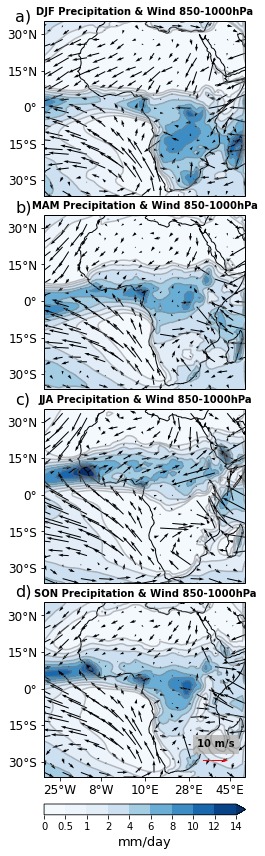

In [16]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=4,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)},
                        figsize=(4,15))

ax=ax.flatten()
#lats=range(87,124)
#lons=list(range(273,288))+ list(range(0,41))
levs=[0,0.5,1,2,4,6,8,10,12,14]
titles=seas
letters=['a)','b)','c)','d)']
a=0
b=7

for i in range(4):  
    lats=range(57,134)
    lons=list(range(263,288))+ list(range(0,41))
    
    u0=np.average(U[0][i][a:b,57:134,lons],weights=v_weights[a:b],axis=0)
    v0=np.average(V[0][i][a:b,57:134,lons],weights=v_weights[a:b],axis=0)
    #add cyclic point to fill in 0 lon
    
    u0,lon= add_cyclic_point(u0,coord=((cdat[0][0].lon[lons] - 180) % 360) - 180)
    v0,lon= add_cyclic_point(v0,coord=((cdat[0][0].lon[lons] - 180) % 360) - 180)

    
    un= np.empty(np.shape(u0)) ; vn= np.empty(np.shape(v0))
    un[:]=np.nan ; vn[:]=np.nan
    un[::6, 2::6]=u0[::6, 2::6] ; vn[::6, 2::6]=v0[::6, 2::6] #even rows, odd col
    un[2::6, ::6]=u0[2::6, ::6] ; vn[2::6, ::6]=v0[2::6, ::6] #odd rows, even col
    
    diff=(cdat[0][i].PRECC[0,lats,lons]+cdat[0][i].PRECL[0,lats,lons])*86400000
    diff,lon= add_cyclic_point(diff,coord=((cdat[0][0].lon[lons] - 180) % 360) - 180)    
    #add cyclic point to fill in 0 lon
    #data,lons= add_cyclic_point(diff,coord=icdd[0].lon)

    # Make a filled contour plot

    cs=ax[i].contourf(lon,cdat[0][0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=levs,cmap='Blues',extend='max')
    con=ax[i].contour(lon,cdat[0][0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=levs,colors='grey',alpha=0.5)
    quiv=ax[i].quiver(lon,cdat[0][0].lat[lats],un,vn,transform = ccrs.PlateCarree(),alpha=1,scale=80,width=0.005)
    if i==3:
        qk=ax[i].quiverkey(quiv,0.85,0.1,10,'10 m/s',fontproperties={'size':10,'weight':'bold'},color='red',labelsep=0.15)
        qk.text.set_backgroundcolor('silver')
    # Add coastlines
    ax[i].coastlines()
    # Define the xticks for longitude
    if i==3:
        lons=((cdat[0][i].lon[lons] - 180) % 360) - 180
        xlab=ax[i].set_xticks(np.linspace(-25,45,5).round(decimals=0), crs=ccrs.PlateCarree())
        ax[i].set_xticklabels(xlab,fontsize=12)
        lon_formatter = cticker.LongitudeFormatter()
        ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    
    ylab=ax[i].set_yticks(np.linspace(-30,30,5).round(decimals=0), crs=ccrs.PlateCarree())
    ax[i].set_yticklabels(ylab,fontsize=12)
    lat_formatter = cticker.LatitudeFormatter()
    ax[i].yaxis.set_major_formatter(lat_formatter)

    ax[i].set_title(titles[i]+' Precipitation & Wind 850-1000hPa',size=10,fontweight='bold')
    #ax[i].set_title(letters[i],size=16,loc='left')
    ax[i].text(0.05, 0.95-(i*(.71/4)), letters[i], fontsize=16, transform=plt.gcf().transFigure)
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.95, left=0, right=1,
                    wspace=0.01, hspace=0.11)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.215, 0.7, 0.01]) #left bottom width height

# Draw the colorbar
cbar=fig.colorbar(cs,ticks=levs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('mm/day',size=13)
cbar.ax.set_xticklabels(levs)
cbar.ax.tick_params(labelsize=10)

plt.savefig('/homes/sknapp4/figures/PIseasprecipwind.pdf')
#plt.savefig('/homes/sknapp4/figures/PIseasprecipwind.png')

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/

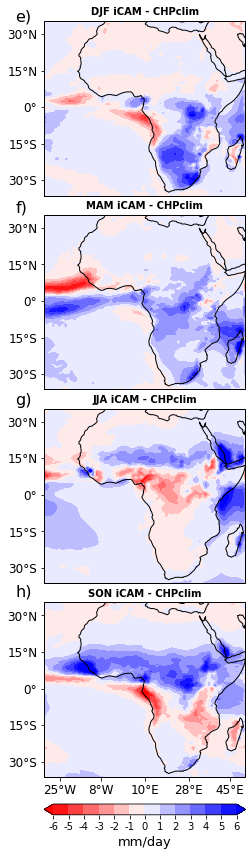

In [49]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=4,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)},
                        figsize=(4,15))

ax=ax.flatten()
levs=np.arange(-6,7)
titles=seas
letters=['e)','f)','g)','h)']
a=0
b=7

for i in range(4):  
    lats=range(57,134)
    lons=list(range(263,288))+ list(range(0,41))
    
    
    diff=(cdat[0][i].PRECC[0,lats,lons]+cdat[0][i].PRECL[0,lats,lons])*86400000 - chirpseas[i][lats,lons]
    diff,lon= add_cyclic_point(diff,coord=((cdat[0][0].lon[lons] - 180) % 360) - 180)    
    #add cyclic point to fill in 0 lon
    #data,lons= add_cyclic_point(diff,coord=icdd[0].lon)

    # Make a filled contour plot

    cs=ax[i].contourf(lon,cdat[0][0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=levs,cmap='bwr_r',extend='both')
    #con=ax[i].contour(lon,cdat[0][0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=levs,colors='grey',alpha=0.5)

    # Add coastlines
    ax[i].coastlines()

    # Define the xticks for longitude
    if i==3:
        lons=((cdat[0][i].lon[lons] - 180) % 360) - 180
        xlab=ax[i].set_xticks(np.linspace(-25,45,5).round(decimals=0), crs=ccrs.PlateCarree())
        ax[i].set_xticklabels(xlab,fontsize=12)
        lon_formatter = cticker.LongitudeFormatter()
        ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    
    ylab=ax[i].set_yticks(np.linspace(-30,30,5).round(decimals=0), crs=ccrs.PlateCarree())
    ax[i].set_yticklabels(ylab,fontsize=12)
    lat_formatter = cticker.LatitudeFormatter()
    ax[i].yaxis.set_major_formatter(lat_formatter)

    ax[i].set_title(seas[i]+' iCAM - CHPclim',size=10,fontweight='bold')
    #ax[i].set_title(letters[i],size=16,loc='left')
    ax[i].text(0.05, 0.95-(i*(.71/4)), letters[i], fontsize=16, transform=plt.gcf().transFigure)
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.95, left=0, right=1,
                    wspace=0.01, hspace=0.11)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.215, 0.7, 0.01]) #left bottom width height

# Draw the colorbar
cbar=fig.colorbar(cs,ticks=levs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('mm/day',size=13)
cbar.ax.set_xticklabels(levs)
cbar.ax.tick_params(labelsize=10)

#plt.savefig('/homes/sknapp4/figures/africaprecipbias.pdf')
#plt.savefig('/homes/sknapp4/figures/africaprecipbias.png')

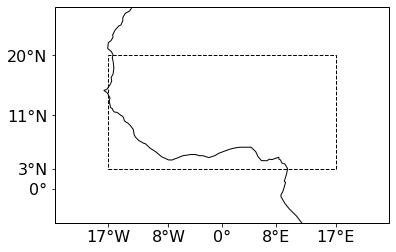

In [50]:
import matplotlib.patches as patches
lats=range(99,118) #3-20N 
lons=list(range(276,288))+ list(range(0,13)) # 15W - 15E
#diff=0
#diff,lon= add_cyclic_point(diff,coord=(pi.lon[lons])    )
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

ylab=ax.set_yticks([0,3,11,20] , crs=ccrs.PlateCarree())
ax.set_yticklabels(ylab,fontsize=16)
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
xlab=ax.set_xticks([-17,-8,0,8,17] , crs=ccrs.PlateCarree())
ax.set_xticklabels(xlab,fontsize=16)
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent((-25,25,-5,25))

rect = patches.Rectangle((-17,3),34,17, linewidth=1, edgecolor='black', facecolor='none',linestyle='--')
ax.add_patch(rect)
#plt.savefig('/homes/sknapp4/figures/africaprecipbox.png')

Text(0.5, 1.0, 'Daily Rainfall 3-20°N 17°W-17°E')

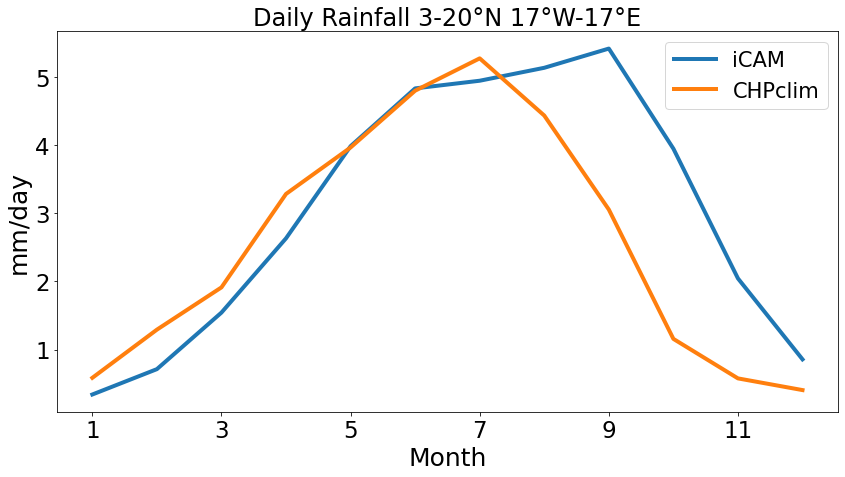

In [51]:
deg=u'\N{DEGREE SIGN}'
plt.figure(figsize=(14,7))
lats=range(99,118) #3-20N 
lons=list(range(274,288))+ list(range(0,15)) # 15W - 15E
plt.plot( np.average( (monthly.PRECC[:,lats,lons]+monthly.PRECL[:,lats,lons]).mean(dim='lon').T*86400000,axis=0,weights=abs(np.cos(monthly.lat[lats]*np.pi/180))), label='iCAM',linewidth=4)
plt.plot( np.average( (chp.precip[:,lats,lons]).mean(dim='lon').T/days,axis=0,weights=abs(np.cos(monthly.lat[lats]*np.pi/180))), label='CHPclim',linewidth=4)
plt.legend(fontsize=21)

plt.yticks(size=23)
plt.ylabel('mm/day',size=25)
plt.xticks(ticks=[0,2,4,6,8,10],labels=[1,3,5,7,9,11],size=23)
plt.xlabel('Month',size=25)
plt.title('Daily Rainfall 3-20'+deg+'N 17'+deg+'W-17'+deg+'E',size=24)
#plt.savefig('/homes/sknapp4/figures/totalprecipsahel.png')

# GNIP data

In [4]:
gnip=pd.read_csv('~/isotope_data/Wiser_BulkData(3).csv')
#gnip=gnip.loc[gnip['H2'].notna()]
gnipsa=pd.read_csv('~/isotope_data/Wiser_BulkData_SA.csv')

In [5]:
gnip=pd.concat([gnip,gnipsa])

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, 

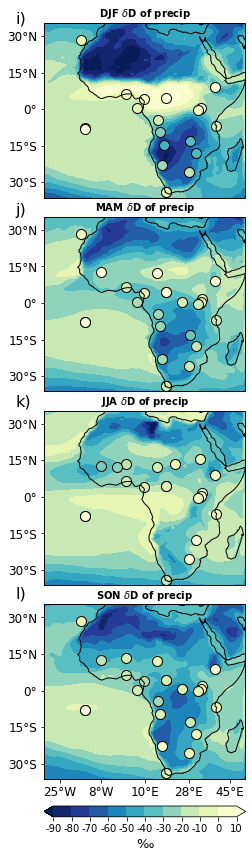

In [54]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, ax = plt.subplots(nrows=4,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)},
                        figsize=(4,15))
seasn=[[12,1,2],[3,4,5],[6,7,8],[9,10,11]]
ax=ax.flatten()
levs=np.arange(-90,20,10)
titles=seas
letters=['i)','j)','k)','l)']

for i in range(4):  
    lats=range(57,134)
    lons=list(range(263,288))+ list(range(0,41))
    
    diff=icdd[0][i][lats,lons]
    diff,lon= add_cyclic_point(diff,coord=((cdat[0][0].lon[lons] - 180) % 360) - 180)    

    # Make a filled contour plot
    norm = matplotlib.colors.Normalize(vmin=-90,vmax=10)
    cs=ax[i].contourf(lon,cdat[0][0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=levs,norm=norm,cmap='YlGnBu_r',extend='both')
    #con=ax[i].contour(lon,cdat[0][0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=levs,colors='grey',alpha=0.5)
    
    # Add coastlines
    ax[i].coastlines()
    
    #plot GNIP data
    for site in np.unique(gnip["Site"]):
        d=gnip.loc[gnip['Site']==site ]
        mo=seasn[i]
        inseas=d.iloc[ np.where((pd.to_datetime(d['Date']).dt.month.isin(mo) )) ]
        if len(inseas['H2'].dropna()) >= 15:
            ax[i].scatter(d['Longitude'].iloc[0],d['Latitude'].iloc[0],c=inseas['H2'].mean(),s=100,cmap=plt.get_cmap('YlGnBu_r'),norm=norm,edgecolor='black')

    # Define the xticks for longitude
    if i==3:
        lons=((cdat[0][i].lon[lons] - 180) % 360) - 180
        xlab=ax[i].set_xticks(np.linspace(-25,45,5).round(decimals=0), crs=ccrs.PlateCarree())
        ax[i].set_xticklabels(xlab,fontsize=12)
        lon_formatter = cticker.LongitudeFormatter()
        ax[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    
    ylab=ax[i].set_yticks(np.linspace(-30,30,5).round(decimals=0), crs=ccrs.PlateCarree())
    ax[i].set_yticklabels(ylab,fontsize=12)
    lat_formatter = cticker.LatitudeFormatter()
    ax[i].yaxis.set_major_formatter(lat_formatter)

    ax[i].set_title(titles[i]+' $\delta$D of precip',size=10,fontweight='bold')
    #ax[i].set_title(letters[i],size=16,loc='left')
    ax[i].text(0.05, 0.95-(i*(.71/4)), letters[i], fontsize=16, transform=plt.gcf().transFigure)
    

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.95, left=0, right=1,
                    wspace=0.01, hspace=0.11)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.215, 0.7, 0.01]) #left bottom width height

# Draw the colorbar
cbar=fig.colorbar(cs,ticks=levs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('‰',size=13)
cbar.ax.set_xticklabels(levs)
cbar.ax.tick_params(labelsize=10)

#plt.savefig('/homes/sknapp4/figures/PIseasdd.pdf')


# Proxy Comparison

In [9]:
#folders=['default_100yr_iCESM','a4xplusHad','EPplusHad','PLIOMIPplusHad']
exps=['PI','Abrupt4xCO2','Early Pliocene','Late Pliocene'] 
cdat=[[],[],[],[]]
for i in range(4):
    #cdat[i]=xr.open_dataset('/project/CAREER_PWC/sknapp/'+folders[i]+'/annualclim.nc',decode_times=True)
    cdat[i]=xr.open_dataset(f"{exps[i]}_annual_vars.nc")
# LEAF WAX
lw=pd.read_csv('/homes/sknapp4/isotope_data/Scott_plot_proxy_dDp.csv')


In [10]:
#d18 calc

expss=['PIC','A4X','EP','LP']


icdd=[[],[],[],[]]

for i in range(4):
    
    icdd[i]= (((cdat[i].PRECRC_HDOr[0,:,:]+cdat[i].PRECRL_HDOR[0,:,:]+cdat[i].PRECSC_HDOs[0,:,:]+cdat[i].PRECSL_HDOS[0,:,:])/(cdat[i].PRECRC_H2Or[0,:,:]+cdat[i].PRECRL_H2OR[0,:,:]+cdat[i].PRECSC_H2Os[0,:,:]+cdat[i].PRECSL_H2OS[0,:,:]))-1)*1000 





In [11]:
# make new points on shore for all proxy
lw['NewLat']=lw['Lat']
lw['NewLon']=lw['Long']

datlist=list([0,1,2,3,4,5,6,8])
lats=range(58,126)
lons=list(range(270,288))+ list(range(0,73))
 
latchange=[ 2,0.5,-2,2 ,0,2,1 ,0,1 ,0,0 ]
lonchange=[-3,2  ,-3,-3,4,0,-1,0,-1,0,0 ]
for i in range(len(lw['NewLat'])):
    lw['NewLat'][i]=lw['Lat'][i] +latchange[i]
    lw['NewLon'][i]=lw['Long'][i]+lonchange[i]
#lw

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [12]:
datlist=list([0,1,2,3,4,5,6,8])
lats=range(58,126)
lons=list(range(270,288))+ list(range(0,73))
circles=[]

#this finds circular areas on land within X km of a point
for i in (datlist):
    arr=np.zeros((len(lats),len(lons))) #domain of zeroes
    originlat=lw['NewLat'][datlist][i] #circle center lat
    originlon=lw["NewLon"][datlist][i] #circle center lon
    eradius=6371 #earth radius km
    cradius=600 #circle radius km 

    if i==5: #larger radii for W african wind deposited 
        cradius=1000 
    # r*dtheta = arc length
    degradius= cradius/eradius * 180/np.pi #get the radius of circle in degrees
    if i==2: #231 ignore arabia to north, add afar triangle
        masklat = abs((cdat[0].lat[lats]-originlat)) < 3 
        masklon = abs(((cdat[0].lon[lons]- 180) % 360) - 180 -originlon)<6 
        arr[masklat & masklon] = 1
    elif i==4: #make a rectangle for this point
        masklat = abs((cdat[0].lat[lats]-originlat)) < 6 
        masklon = abs(((cdat[0].lon[lons]- 180) % 360) - 180 -originlon)<25
        arr[masklat & masklon] = 1
    else:
        mask = (((cdat[0].lon[lons]- 180) % 360) - 180 -originlon)**2 + (cdat[0].lat[lats]-originlat)**2 < degradius**2 # find all points whose distance (in degrees) is less than the radius
        #mask =  ( abs(np.cos(cdat[0].lat[lats]*np.pi/180))*(((cdat[0].lon[lons]- 180) % 360) - 180) - abs(np.cos(originlat*np.pi/180))*originlon)**2 +  (cdat[0].lat[lats]-originlat)**2 < degradius**2
        arr[mask.T] = 1
    arr = np.where(cdat[0].OCNFRAC[0,lats,lons]<0.8,arr,0)
    arr = np.where(arr==0,np.nan,1)
    circles.append(arr)
    

#plt.contourf(circles[0])

In [13]:
datlist=list([0,1,2,3,4,5,6,8])
lats=range(58,126)
lons=list(range(270,288))+ list(range(0,73))
rms=[]
for ex in range(4):
    errors=[]
    for i in range(len(datlist)):

        dd= icdd[ex][lats,lons]
        #area_mean = np.nanmean( np.where(circles[i]==1, dd*abs(np.cos(dd.lat*np.pi/180)), np.nan )  )
        #sum all lat weighted areas, each area divided by the sum of weights
        a2=np.nansum(np.where(circles[i]==1, dd*abs(np.cos(dd.lat*np.pi/180)), np.nan )/ np.nansum(np.where(circles[i]==1, (dd/dd)*abs(np.cos(dd.lat*np.pi/180)) , np.nan )) )
       # print(f"{ex} {a2.round()}")
        prox = lw['dDp.1'][datlist[i]]
#         if ex==2 and i in [4,5]:
#             print(area_mean)
#             print(prox)
        errors.append(prox-a2)
    rms.append( np.sqrt(sum([x**2 for x in errors]) / len(errors)).round(decimals=1) )

0 -29.0
0 -41.0
0 -27.0
0 -22.0
0 -39.0
0 -29.0
0 -49.0
0 -40.0
1 -40.0
1 -34.0
1 -30.0
1 -24.0
1 -33.0
1 -21.0
1 -49.0
1 -32.0
2 -35.0
2 -55.0
2 -36.0
2 -30.0
2 -53.0
2 -51.0
2 -45.0
2 -51.0
3 -36.0
3 -40.0
3 -30.0
3 -23.0
3 -31.0
3 -23.0
3 -55.0
3 -36.0


/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, 

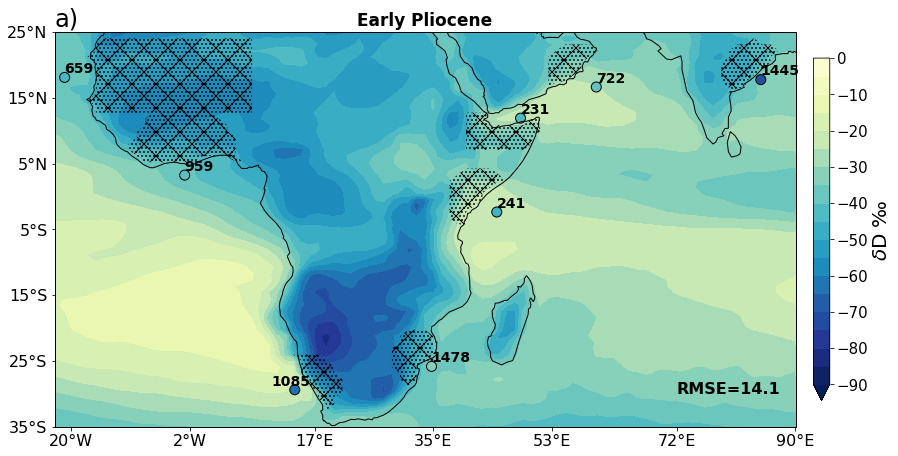

In [14]:
lats=range(58,126)
lons=list(range(270,288))+ list(range(0,73))

var = icdd[2][lats,lons]
# Make the figure larger
fig = plt.figure(figsize=(16,9))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to fill in 0 lon
data,lon= add_cyclic_point(var,coord=((cdat[0].lon[lons] - 180) % 360) - 180)

# Make a filled contour plot
datlist=list([0,1,2,3,4,5,6,8])
norm = matplotlib.colors.Normalize(vmin=-90,vmax=0)
cs=ax.contourf(lon,var.lat,data,transform = ccrs.PlateCarree(),cmap=plt.get_cmap('YlGnBu_r'),norm=norm,levels=np.arange(-90,5,5),extend='min')
cb=plt.colorbar(cs,orientation='vertical',shrink=0.7,pad=0.02)
cb.set_label(label=r'$\delta$D ‰',size=20)
cb.ax.tick_params(labelsize=15)

for i in range(len(circles)):
    circ,lon= add_cyclic_point(circles[i],coord=((cdat[0].lon[lons] - 180) % 360) - 180)
    plt.contourf(lon,var.lat,circ, transform = ccrs.PlateCarree(), levels=[0,1],colors='none' ,hatches=['\\/...'])

plt.scatter(lw['Long'][datlist],lw['Lat'][datlist],c=lw['dDp.1'][datlist],s=100,cmap=plt.get_cmap('YlGnBu_r'),norm=norm,edgecolor='black')
#plt.scatter(lw['NewLon'][datlist],lw['NewLat'][datlist],c='black',s=60,cmap=plt.get_cmap('gist_ncar_r'),norm=norm,edgecolor='black') #the artificial center of the averaging region

for i in lw['Label'][datlist].index:
    if i==1:
        plt.annotate(lw['Label'][datlist][i] , (lw['Long'][datlist][i]-3.5,lw['Lat'][datlist][i]+.7),fontweight='bold',fontsize=14)
    else:
        plt.annotate(lw['Label'][datlist][i] , (lw['Long'][datlist][i],lw['Lat'][datlist][i]+.7),fontweight='bold',fontsize=14)
        


# Add coastlines
ax.coastlines()

lons=((cdat[0].lon[lons] - 180) % 360) - 180
# Define the xticks for longitude
xlab=ax.set_xticks(np.linspace(-20,90,7).round(decimals=0), crs=ccrs.PlateCarree())
ax.set_xticklabels(xlab,fontsize=16)
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ylab=ax.set_yticks(np.linspace(-35,25,7).round(decimals=0), crs=ccrs.PlateCarree())
ax.set_yticklabels(ylab,fontsize=16)
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

plt.text( 72, -30, 'RMSE='+str(rms[2]), fontweight='bold', fontsize=16)
plt.title('Early Pliocene',fontsize=17,fontweight='bold')
plt.title('a)',loc='left',size=24)
plt.savefig('/homes/sknapp4/figures/epcomp.pdf')

In [15]:
datlist=list([0,1,2,6,7,8])
lats=range(58,126)
lons=list(range(270,288))+ list(range(0,73))
circles=[]

#this finds circular areas on land within X km of a point
for i in (datlist):
    arr=np.zeros((len(lats),len(lons))) #domain of zeroes
    originlat=lw['NewLat'][datlist][i] #circle center lat
    originlon=lw["NewLon"][datlist][i] #circle center lon
    eradius=6371 #earth radius km
    cradius=600 #circle radius km 
    
    if i==7: # E african lake
        cradius=400
    # r*dtheta = arc length
    degradius= cradius/eradius * 180/np.pi #get the radius of circle in degrees
    
    if i==2: #231 ignore arabia to north, add afar triangle
        masklat = abs((cdat[0].lat[lats]-originlat)) < 3 
        masklon = abs(((cdat[0].lon[lons]- 180) % 360) - 180 -originlon)<6 
        arr[masklat & masklon] = 1
    else:
        mask = (((cdat[0].lon[lons]- 180) % 360) - 180 -originlon)**2 + (cdat[0].lat[lats]-originlat)**2 < degradius**2 # find all points whose distance (in degrees) is less than the radius
        arr[mask.T] = 1
    arr = np.where(cdat[0].OCNFRAC[0,lats,lons]<0.8,arr,0)
    arr = np.where(arr==0,np.nan,1)
    circles.append(arr)
    
#plt.contourf(circles[5])

In [16]:
datlist=list([0,1,2,6,7,8])
lats=range(58,126)
lons=list(range(270,288))+ list(range(0,73))
rms=[]
for ex in range(4):
    errors=[]
    for i in range(len(datlist)):

        dd= icdd[ex][lats,lons]
        #area_mean = np.nanmean( np.where(circles[i]==1, dd*abs(np.cos(dd.lat*np.pi/180)), np.nan )  )
        a2=np.nansum(np.where(circles[i]==1, dd*abs(np.cos(dd.lat*np.pi/180)), np.nan )/ np.nansum(np.where(circles[i]==1, (dd/dd)*abs(np.cos(dd.lat*np.pi/180)) , np.nan )) )
        #print(f"{ex} {a2.round()}")
        prox = lw['dDp'][datlist[i]]
        errors.append(prox-a2)
    rms.append( np.sqrt(sum([x**2 for x in errors]) / len(errors)).round(decimals=1) )


/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, 

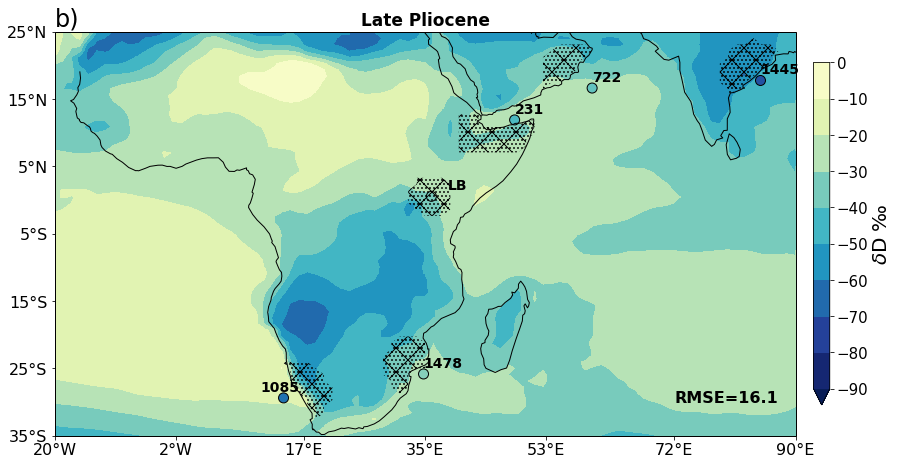

In [17]:
lats=range(58,126)
lons=list(range(270,288))+ list(range(0,73))

var = icdd[3][lats,lons]
# Make the figure larger
fig = plt.figure(figsize=(16,9))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to fill in 0 lon
data,lon= add_cyclic_point(var,coord=((cdat[0].lon[lons] - 180) % 360) - 180)

# Make a filled contour plot
datlist=list([0,1,2,6,7,8])
norm = matplotlib.colors.Normalize(vmin=-90,vmax=0)
cs=ax.contourf(lon,var.lat,data,transform = ccrs.PlateCarree(),cmap=plt.get_cmap('YlGnBu_r'),norm=norm,levels=np.arange(-90,10,10),extend='min')
cb=plt.colorbar(cs,orientation='vertical',shrink=0.7,pad=0.02)
cb.set_label(label=r'$\delta$D ‰',size=20)
cb.ax.tick_params(labelsize=15)


for i in range(len(circles)):
    circ,lon= add_cyclic_point(circles[i],coord=((cdat[0].lon[lons] - 180) % 360) - 180)
    plt.contourf(lon,var.lat,circ, transform = ccrs.PlateCarree(), levels=[0,1],colors='none' ,hatches=['\\/...'])
    
plt.scatter(lw['Long'][datlist],lw['Lat'][datlist],c=lw['dDp.1'][datlist],s=100,cmap=plt.get_cmap('YlGnBu_r'),norm=norm,edgecolor='black')
    
for i in lw['Label'][datlist].index:
    if i==1:
        plt.annotate(lw['Label'][datlist][i] , (lw['Long'][datlist][i]-3.5,lw['Lat'][datlist][i]+1),fontweight='bold',fontsize=14)
    elif i==7:
        plt.annotate(lw['Label'][datlist][i] , (lw['Long'][datlist][i]+2.5,lw['Lat'][datlist][i]+1),fontweight='bold',fontsize=14)
    else:
        plt.annotate(lw['Label'][datlist][i] , (lw['Long'][datlist][i],lw['Lat'][datlist][i]+1),fontweight='bold',fontsize=14)        


# Add coastlines
ax.coastlines()

lons=((cdat[0].lon[lons] - 180) % 360) - 180
# Define the xticks for longitude
xlab=ax.set_xticks(np.linspace(-20,90,7).round(decimals=0), crs=ccrs.PlateCarree())
ax.set_xticklabels(xlab,fontsize=16)
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ylab=ax.set_yticks(np.linspace(-35,25,7).round(decimals=0), crs=ccrs.PlateCarree())
ax.set_yticklabels(ylab,fontsize=16)
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

plt.text( 72, -30, 'RMSE='+str(rms[3]), fontweight='bold', fontsize=16)
plt.title('Late Pliocene',fontsize=17,fontweight='bold')
plt.title('b)',loc='left',size=24)
plt.savefig('/homes/sknapp4/figures/lpcomp.pdf')

In [64]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'numpy',
 'matplotlib',
 'matplotlib.pyplot',
 'xarray',
 'cartopy',
 'cartopy.crs',
 'cartopy.mpl.ticker',
 'xesmf',
 'matplotlib.lines',
 'pandas',
 'metpy',
 'Ngl',
 'matplotlib.patches',
 'types']

In [65]:
import session_info

In [66]:
session_info.show()

# Supplementary Figure 1

/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/sknapp4/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If a

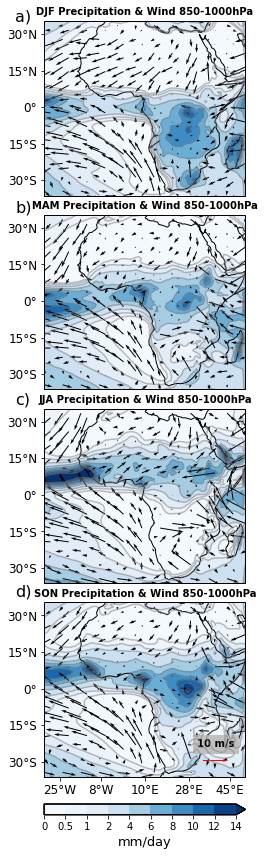

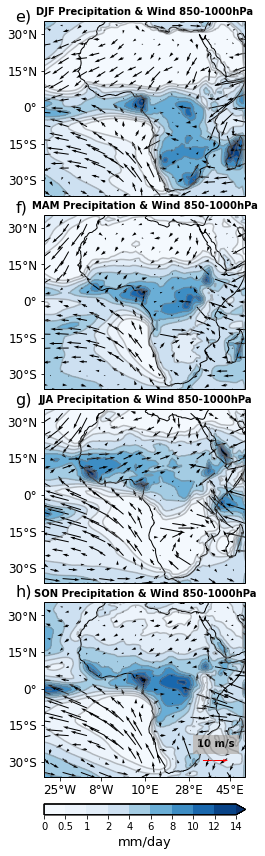

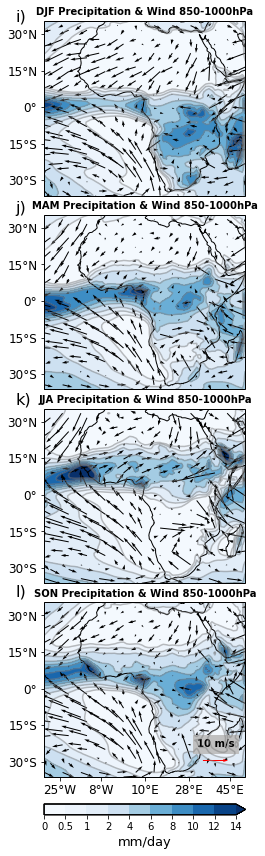

In [44]:


#lats=range(87,124)
#lons=list(range(273,288))+ list(range(0,41))
levs=[0,0.5,1,2,4,6,8,10,12,14]
titles=['DJF','MAM','JJA','SON']
letters=[['a)','b)','c)','d)'],['e)','f)','g)','h)'],['i)','j)','k)','l)']]
a=0
b=7
for ex in range(1,4):
    fig, ax = plt.subplots(nrows=4,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)},
                        figsize=(4,15))

    ax=ax.flatten()
    for i in range(4):  
        lats=range(57,134)
        lons=list(range(263,288))+ list(range(0,41))

        u0=np.average(U[ex][i][a:b,57:134,lons],weights=v_weights[a:b],axis=0)
        v0=np.average(V[ex][i][a:b,57:134,lons],weights=v_weights[a:b],axis=0)
        #add cyclic point to fill in 0 lon

        u0,lon= add_cyclic_point(u0,coord=((cdat[0][0].lon[lons] - 180) % 360) - 180)
        v0,lon= add_cyclic_point(v0,coord=((cdat[0][0].lon[lons] - 180) % 360) - 180)


        un= np.empty(np.shape(u0)) ; vn= np.empty(np.shape(v0))
        un[:]=np.nan ; vn[:]=np.nan
        un[::6, 2::6]=u0[::6, 2::6] ; vn[::6, 2::6]=v0[::6, 2::6] #even rows, odd col
        un[2::6, ::6]=u0[2::6, ::6] ; vn[2::6, ::6]=v0[2::6, ::6] #odd rows, even col

        diff=(cdat[ex][i].PRECC[0,lats,lons]+cdat[ex][i].PRECL[0,lats,lons])*86400000
        diff,lon= add_cyclic_point(diff,coord=((cdat[0][0].lon[lons] - 180) % 360) - 180)    
        #add cyclic point to fill in 0 lon
        #data,lons= add_cyclic_point(diff,coord=icdd[0].lon)

        # Make a filled contour plot

        cs=ax[i].contourf(lon,cdat[0][0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=levs,cmap='Blues',extend='max')
        con=ax[i].contour(lon,cdat[0][0].lat[lats],diff,transform = ccrs.PlateCarree(),levels=levs,colors='grey',alpha=0.5)
        quiv=ax[i].quiver(lon,cdat[0][0].lat[lats],un,vn,transform = ccrs.PlateCarree(),alpha=1,scale=80,width=0.005)
        if i==3:
            qk=ax[i].quiverkey(quiv,0.85,0.1,10,'10 m/s',fontproperties={'size':10,'weight':'bold'},color='red',labelsep=0.15)
            qk.text.set_backgroundcolor('silver')
        # Add coastlines
        ax[i].coastlines()
        # Define the xticks for longitude
        if i==3:
            lons=((cdat[0][i].lon[lons] - 180) % 360) - 180
            xlab=ax[i].set_xticks(np.linspace(-25,45,5).round(decimals=0), crs=ccrs.PlateCarree())
            ax[i].set_xticklabels(xlab,fontsize=12)
            lon_formatter = cticker.LongitudeFormatter()
            ax[i].xaxis.set_major_formatter(lon_formatter)

        # Define the yticks for latitude

        ylab=ax[i].set_yticks(np.linspace(-30,30,5).round(decimals=0), crs=ccrs.PlateCarree())
        ax[i].set_yticklabels(ylab,fontsize=12)
        lat_formatter = cticker.LatitudeFormatter()
        ax[i].yaxis.set_major_formatter(lat_formatter)

        ax[i].set_title(titles[i]+' Precipitation & Wind 850-1000hPa',size=10,fontweight='bold')
        #ax[i].set_title(letters[i],size=16,loc='left')
        ax[i].text(0.05, 0.95-(i*(.71/4)), letters[ex-1][i], fontsize=16, transform=plt.gcf().transFigure)


        # Adjust the location of the subplots 
        # on the page to make room for the colorbar
        fig.subplots_adjust(bottom=0.25, top=0.95, left=0, right=1,
                            wspace=0.01, hspace=0.11)

        # Add a colorbar axis at the bottom of the graph
        cbar_ax = fig.add_axes([0.15, 0.215, 0.7, 0.01]) #left bottom width height

        # Draw the colorbar
        cbar=fig.colorbar(cs,ticks=levs, cax=cbar_ax,orientation='horizontal')
        cbar.set_label('mm/day',size=13)
        cbar.ax.set_xticklabels(levs)
        cbar.ax.tick_params(labelsize=10)

        #plt.savefig('/homes/sknapp4/figures/PIseasprecipwind.pdf')
        plt.savefig(f"/homes/sknapp4/figures/{heat[ex-1]}seasprecipwind.png")

In [32]:
u0=np.average(U[ex][i][a:b,57:134,0:10],weights=v_weights[a:b],axis=0)

IndexError: list index out of range

In [55]:
np.sqrt(np.sum( (np.array([-40,-62,-35,-86,-39,-33])-np.array([-35,-55]))**2)/7)

15.057034426283474

In [56]:
np.sqrt(np.sum( (np.array([-39,-63,-43,-46,-44,-40,-71,-33])-np.array([-36,-40,-30,-23,-31,-23,-55,-36]) )**2)/7)

16.72893131246413